# FINAL PROJECT

## 1 Discover and visualize the data to gain insights

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns

import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/Shareddrives/TFG/clásico_tde_dataset (sample)')

#Reading the different datasets
avg_rt_df = pd.read_csv('avg_rt_tde_190323_21_23.csv', skiprows=1)
connections_df = pd.read_csv('connections_tde_190323_21_23.csv', skiprows=1)
cpu_df = pd.read_csv('cpu_tde_190323_21_23.csv', skiprows=1)
disk_iops_df = pd.read_csv('disk_iops_tde_190323_21_23.csv', skiprows=1)
disk_time_df = pd.read_csv('disk_time_tde_190323_21_23.csv', skiprows=1)
disk_throughput_df = pd.read_csv('disk_troughput_tde_190323_21_23.csv', skiprows=1)
disk_use_df = pd.read_csv('disk_use_tde_190323_21_23.csv', skiprows=1)
hw_df = pd.read_csv('hw_tde.csv', skiprows=1)
network_df = pd.read_csv('network_tde_190323_21_23.csv', skiprows=1)
total_request_df = pd.read_csv('total_request_tde_190323_21_23.csv', skiprows=1)
avg_bitrate_df = pd.read_csv('avg_bitrate_tde_190323_21_23.csv', skiprows=1)
saturations_df = pd.read_csv('saturations_tde_190323_21_23.csv', skiprows=1)
capacity_df = pd.read_csv('capacidades_tde_190323_21_23.csv', skiprows=1)



###CPU (use of cpu, specific unit for each sub-variable)

In [4]:
cpu_df.head()

Time  idle.ce8mde1-01  iowait.ce8mde1-01  irq.ce8mde1-01  \
0  1679256000000        14.091024           0.656179        1.808699   
1  1679256005000              NaN                NaN             NaN   
2  1679256010000        16.934466           1.346008        1.808699   
3  1679256015000              NaN                NaN             NaN   
4  1679256020000        22.889132           1.414260        1.784662   

   system.ce8mde1-01  user.ce8mde1-01  softirq.ce8mde1-01  idle.ce8mde1-02  \
0          21.157567        35.963658           26.322874        38.029696   
1                NaN              NaN                 NaN              NaN   
2          20.072348        34.011946           25.826533        35.208650   
3                NaN              NaN                 NaN              NaN   
4          17.838202        31.298931           24.774813        38.220730   

   iowait.ce8mde1-02  irq.ce8mde1-02  ...  irq.cypmno1-31  system.cypmno1-31  \
0           1.843510        1.618285  ...        0.369202           1.157789   
1                NaN             NaN  ...             NaN                NaN   
2           5.338740        1.596553  ...        0.372760           1.247312   
3                NaN             NaN  ...             NaN                NaN   
4           2.719261        1.594629  ...        0.365526           1.189751   

   user.cypmno1-31  softirq.cypmno1-31  idle.cypmno1-32  iowait.cypmno1-32  \
0         2.702703            0.634454        91.539702           0.720559   
1              NaN                 NaN              NaN                NaN   
2         2.849462            0.666667        91.003982           1.452706   
3              NaN                 NaN              NaN                NaN   
4         3.038882            0.645046        91.313233           0.709856   

   irq.cypmno1-32  system.cypmno1-32  user.cypmno1-32  softirq.cypmno1-32  
0        0.383581           1.896397         4.276752            1.183008  
1             NaN                NaN              NaN                 NaN  
2        0.383801           2.030202         3.931274            1.198034  
3             NaN                NaN              NaN                 NaN  
4        0.387194           1.939555         4.452730            1.197433  

[5 rows x 811 columns]

In [5]:
cpu_df.iloc[:,:7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                1452 non-null   int64  
 1   idle.ce8mde1-01     726 non-null    float64
 2   iowait.ce8mde1-01   726 non-null    float64
 3   irq.ce8mde1-01      726 non-null    float64
 4   system.ce8mde1-01   726 non-null    float64
 5   user.ce8mde1-01     726 non-null    float64
 6   softirq.ce8mde1-01  726 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 79.5 KB


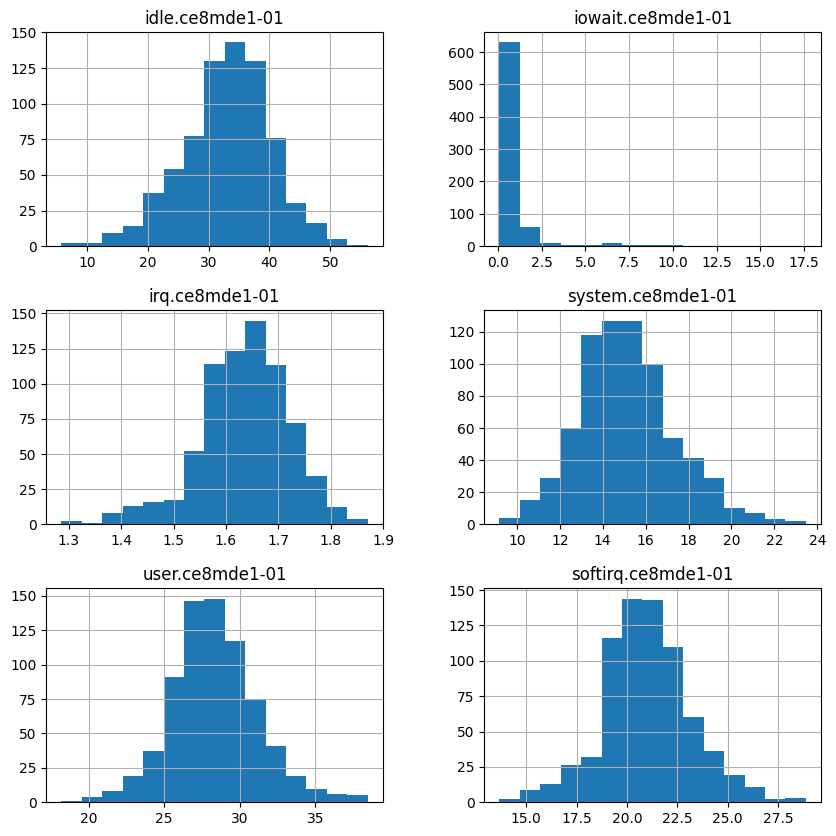

In [6]:
#Distributions of the 6 different variables of each server
cpu_df_hist = cpu_df.iloc[:,1:7].hist(figsize=(10,10),bins=15)

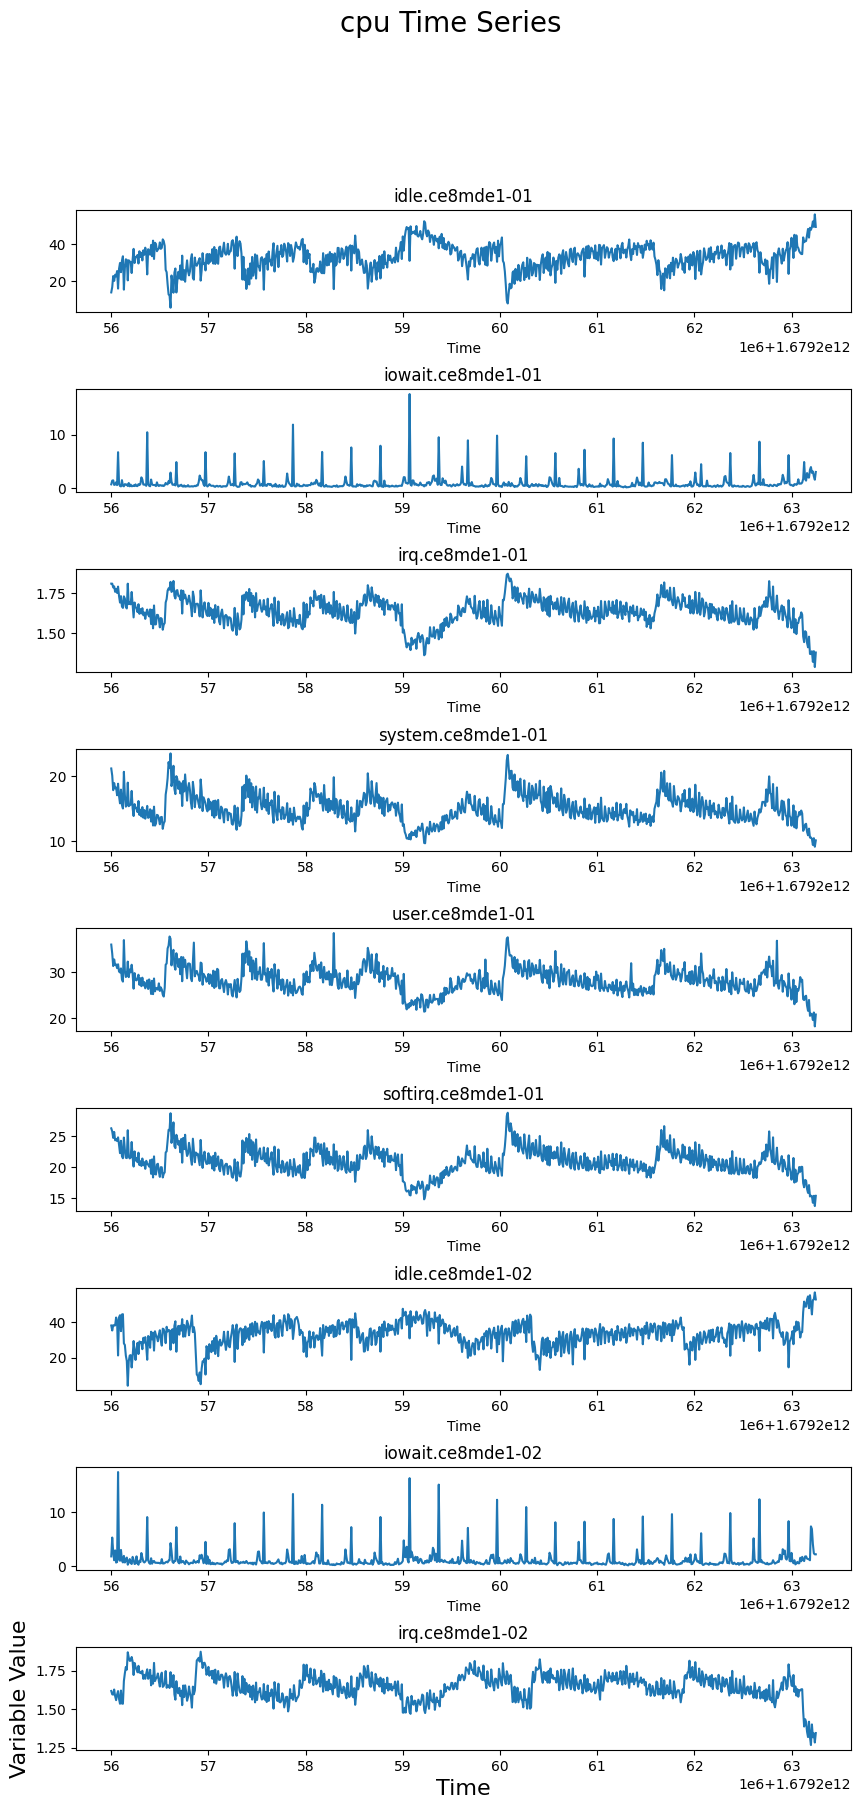

In [7]:
# Read in the dataset
cpu_df = pd.read_csv('cpu_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
cpu_df = cpu_df.iloc[:,:9].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(cpu_df.columns), figsize=(10, 20))
for i, column in enumerate(cpu_df.columns):
    cpu_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('cpu Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

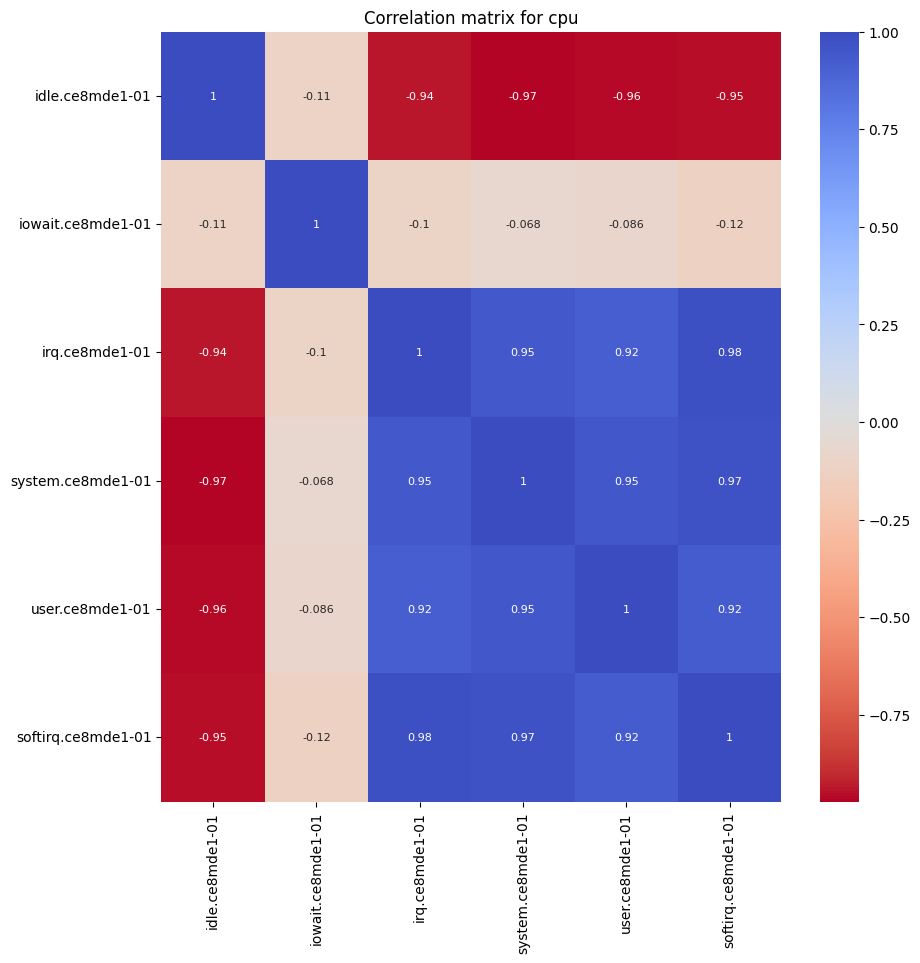

In [8]:
cpu_df = pd.read_csv('cpu_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_cpu = cpu_df.iloc[:,:6].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_cpu, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for cpu')
plt.show()

###AVG RT (service's response times)

In [9]:
avg_rt_df.head(12)

Time  avg_rt.ce8mde1-01.live.dash  \
0   1679256000000                    32.545933   
1   1679256005000                          NaN   
2   1679256010000                          NaN   
3   1679256015000                          NaN   
4   1679256020000                          NaN   
5   1679256025000                          NaN   
6   1679256030000                    30.367104   
7   1679256035000                          NaN   
8   1679256040000                          NaN   
9   1679256045000                          NaN   
10  1679256050000                          NaN   
11  1679256055000                          NaN   

    avg_rt_Cached.ce8mde1-01.live.dash  avg_rt_NoCached.ce8mde1-01.live.dash  \
0                            28.292145                             95.867096   
1                                  NaN                                   NaN   
2                                  NaN                                   NaN   
3                                  NaN                                   NaN   
4                                  NaN                                   NaN   
5                                  NaN                                   NaN   
6                            26.485981                             93.560928   
7                                  NaN                                   NaN   
8                                  NaN                                   NaN   
9                                  NaN                                   NaN   
10                                 NaN                                   NaN   
11                                 NaN                                   NaN   

    avg_rt.ce8mde1-01.live.hls  avg_rt_Cached.ce8mde1-01.live.hls  \
0                    27.782562                          24.863995   
1                          NaN                                NaN   
2                          NaN                                NaN   
3                          NaN                                NaN   
4                          NaN                                NaN   
5                          NaN                                NaN   
6                    24.087936                          22.526777   
7                          NaN                                NaN   
8                          NaN                                NaN   
9                          NaN                                NaN   
10                         NaN                                NaN   
11                         NaN                                NaN   

    avg_rt_NoCached.ce8mde1-01.live.hls  avg_rt.ce8mde1-01.live.smooth  \
0                             72.400879                      42.477547   
1                                   NaN                            NaN   
2                                   NaN                            NaN   
3                                   NaN                            NaN   
4                                   NaN                            NaN   
5                                   NaN                            NaN   
6                             52.530121                      46.588757   
7                                   NaN                            NaN   
8                                   NaN                            NaN   
9                                   NaN                            NaN   
10                                  NaN                            NaN   
11                                  NaN                            NaN   

    avg_rt_Cached.ce8mde1-01.live.smooth  \
0                              20.077364   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   
5                                    NaN   
6                              17.363890   
7                                    NaN   
8                                    NaN   
9                   

In [10]:
avg_rt_df.iloc[:,:19].info()      #################we should remove UNKNOWN and maybe HTTP too

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Time                                     1452 non-null   int64  
 1   avg_rt.ce8mde1-01.live.dash              242 non-null    float64
 2   avg_rt_Cached.ce8mde1-01.live.dash       242 non-null    float64
 3   avg_rt_NoCached.ce8mde1-01.live.dash     242 non-null    float64
 4   avg_rt.ce8mde1-01.live.hls               242 non-null    float64
 5   avg_rt_Cached.ce8mde1-01.live.hls        242 non-null    float64
 6   avg_rt_NoCached.ce8mde1-01.live.hls      242 non-null    float64
 7   avg_rt.ce8mde1-01.live.smooth            242 non-null    float64
 8   avg_rt_Cached.ce8mde1-01.live.smooth     242 non-null    float64
 9   avg_rt_NoCached.ce8mde1-01.live.smooth   242 non-null    float64
 10  avg_rt.ce8mde1-01.live.unknown           31 non-

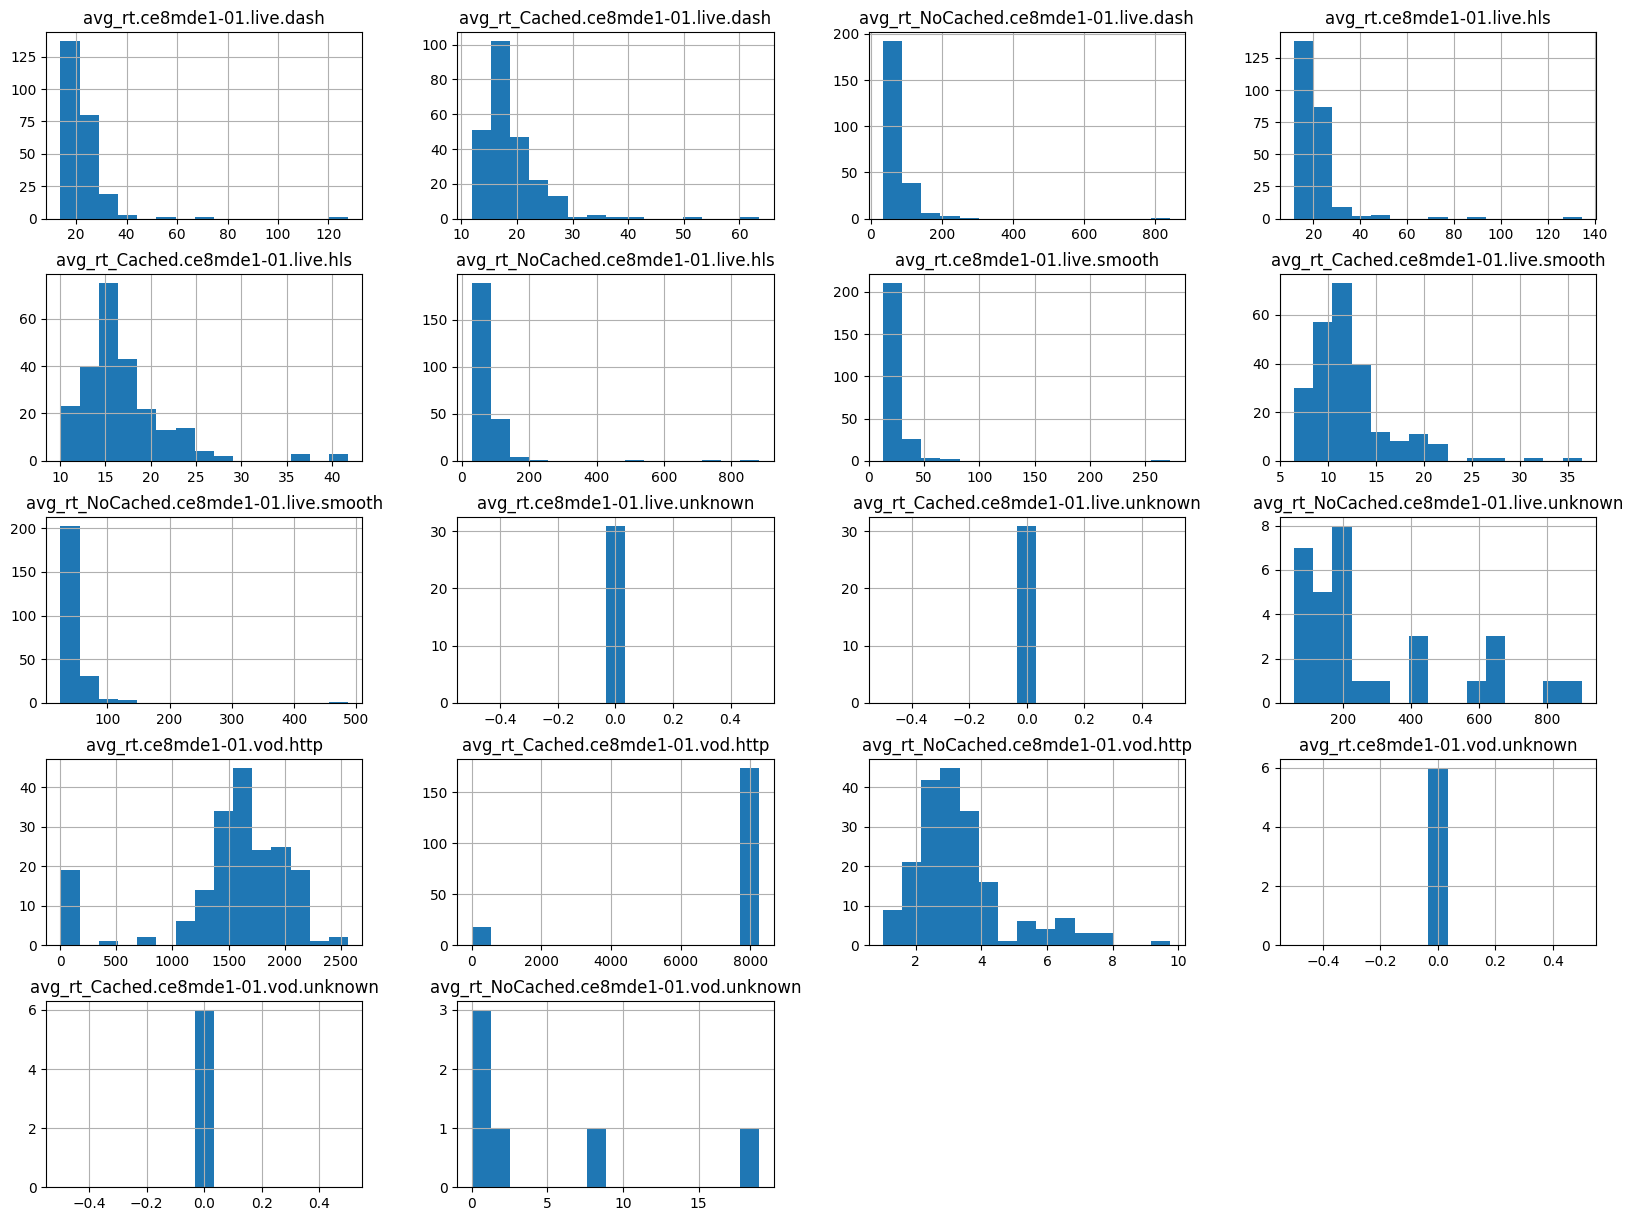

In [11]:
avg_rt_df_hist = avg_rt_df.iloc[:,1:19].hist(figsize=(20,15),bins=15)

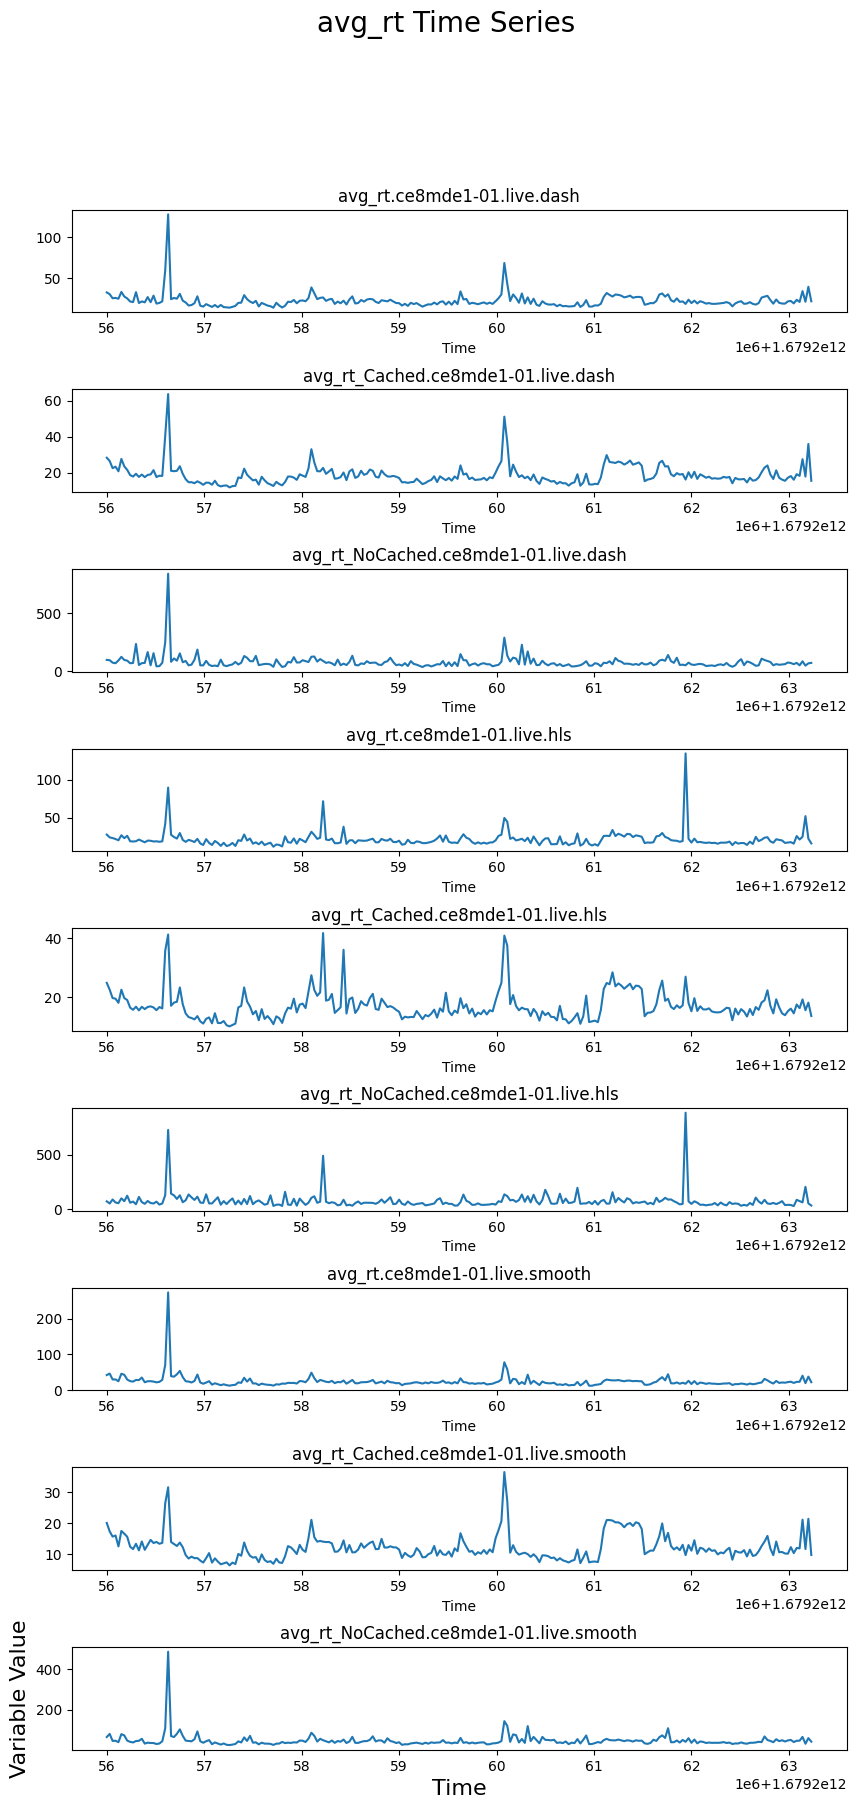

In [12]:
# Read in the dataset
avg_rt_df = pd.read_csv('avg_rt_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
avg_rt_df = avg_rt_df.iloc[:,:9].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(avg_rt_df.columns), figsize=(10, 20))
for i, column in enumerate(avg_rt_df.columns):
    avg_rt_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('avg_rt Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

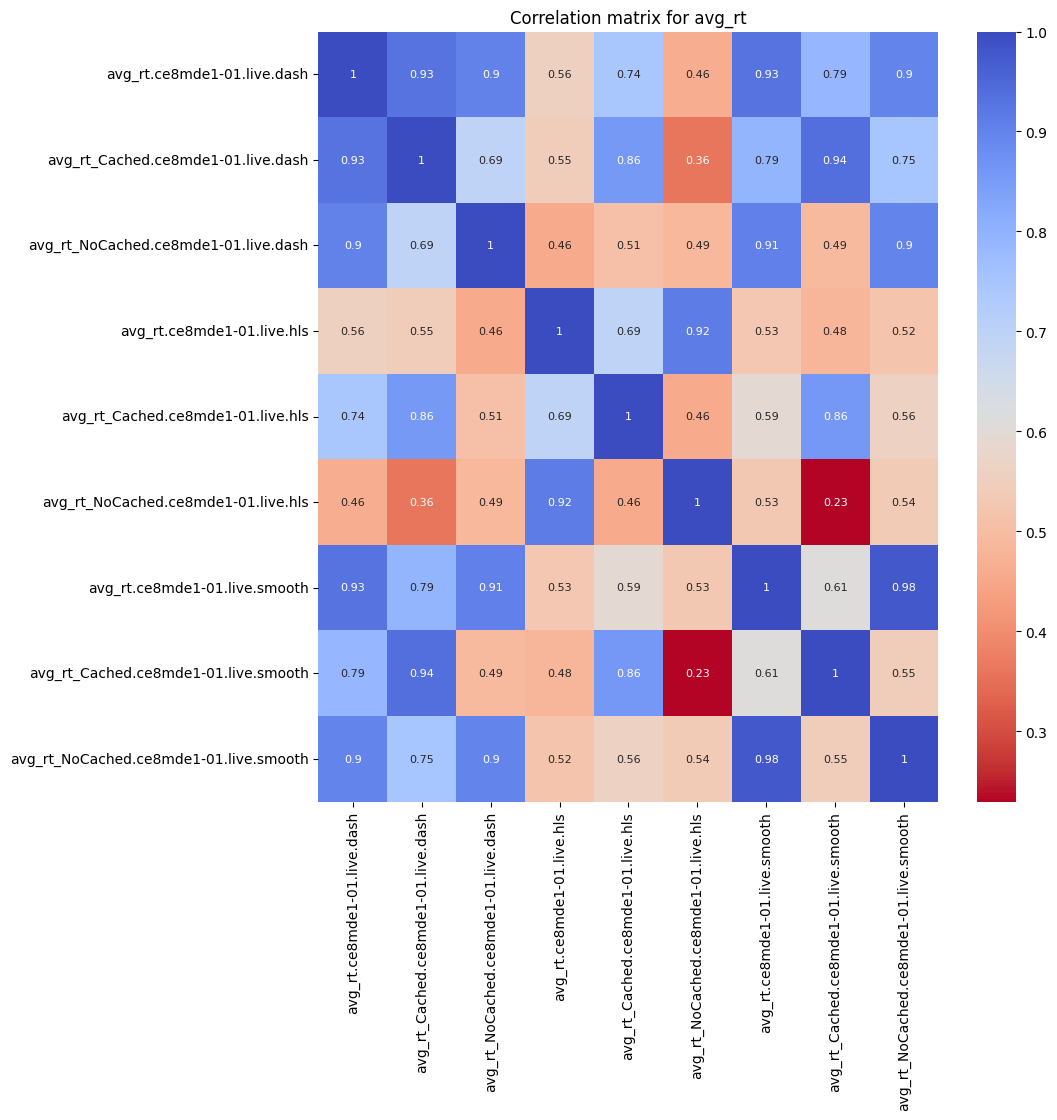

In [13]:
avg_rt_df = pd.read_csv('avg_rt_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_avg_rt = avg_rt_df.iloc[:,:9].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_avg_rt, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for avg_rt')
plt.show()

###CONNECTIONS (connections per second: 443 is encrypted and 80 is not encrypted)

In [14]:
connections_df.head(8)

Time  connections.ce8mde1-01.443  connections.ce8mde1-01.80  \
0  1679256000000                      4740.0                      272.0   
1  1679256005000                         NaN                        NaN   
2  1679256010000                      4635.0                      273.0   
3  1679256015000                         NaN                        NaN   
4  1679256020000                      4453.0                      277.0   
5  1679256025000                         NaN                        NaN   
6  1679256030000                      4345.0                      274.0   
7  1679256035000                         NaN                        NaN   

   connections.ce8mde1-02.443  connections.ce8mde1-02.80  \
0                      3397.0                      432.0   
1                         NaN                        NaN   
2                      3335.0                      419.0   
3                         NaN                        NaN   
4                      3310.0                      415.0   
5                         NaN                        NaN   
6                      3288.0                      408.0   
7                         NaN                        NaN   

   connections.cecbep1-01.443  connections.cecbep1-01.80  \
0                      1368.0                      826.0   
1                         NaN                        NaN   
2                      1352.0                      829.0   
3                         NaN                        NaN   
4                      1370.0                      841.0   
5                         NaN                        NaN   
6                      1356.0                      836.0   
7                         NaN                        NaN   

   connections.cecbep1-02.443  connections.cecbep1-02.80  \
0                      1399.0                     1019.0   
1                         NaN                        NaN   
2                      1424.0                     1020.0   
3                         NaN                        NaN   
4                      1474.0                     1017.0   
5                         NaN                        NaN   
6                      1481.0                     1016.0   
7                         NaN                        NaN   

   connections.cecbep1-03.443  ...  connections.cwfmpe1-02.443  \
0                      2295.0  ...                     38047.0   
1                         NaN  ...                         NaN   
2                      2253.0  ...                     56704.0   
3                         NaN  ...                         NaN   
4                      2242.0  ...                     64403.0   
5                         NaN  ...                         NaN   
6                      2289.0  ...                     66296.0   
7                         NaN  ...                         NaN   

   connections.cwfmpe1-02.80  connections.cwfmpe1-03.443  \
0                    17950.0                     69494.0   
1                        NaN                         NaN   
2                    25474.0                     16794.0   
3                        NaN                         NaN   
4                    27708.0                     30406.0   
5                        NaN                         NaN   
6                    24334.0                     41792.0   
7                        NaN                         NaN   

   connections.cwfmpe1-03.80  connections.cypmno1-11.80  \
0                    27966.0                     4709.0   
1                        NaN                        NaN   
2                     8129.0                     4709.0   
3                        NaN                        NaN   
4                    14092.0                     4710.0   
5                        NaN                        NaN   
6                    19439.0                     4711.0   
7                        NaN                        NaN   

   connections.cypmno1-12.80  connections.cyp

In [15]:
connections_df.iloc[:,:7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        1452 non-null   int64  
 1   connections.ce8mde1-01.443  726 non-null    float64
 2   connections.ce8mde1-01.80   726 non-null    float64
 3   connections.ce8mde1-02.443  726 non-null    float64
 4   connections.ce8mde1-02.80   726 non-null    float64
 5   connections.cecbep1-01.443  726 non-null    float64
 6   connections.cecbep1-01.80   726 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 79.5 KB


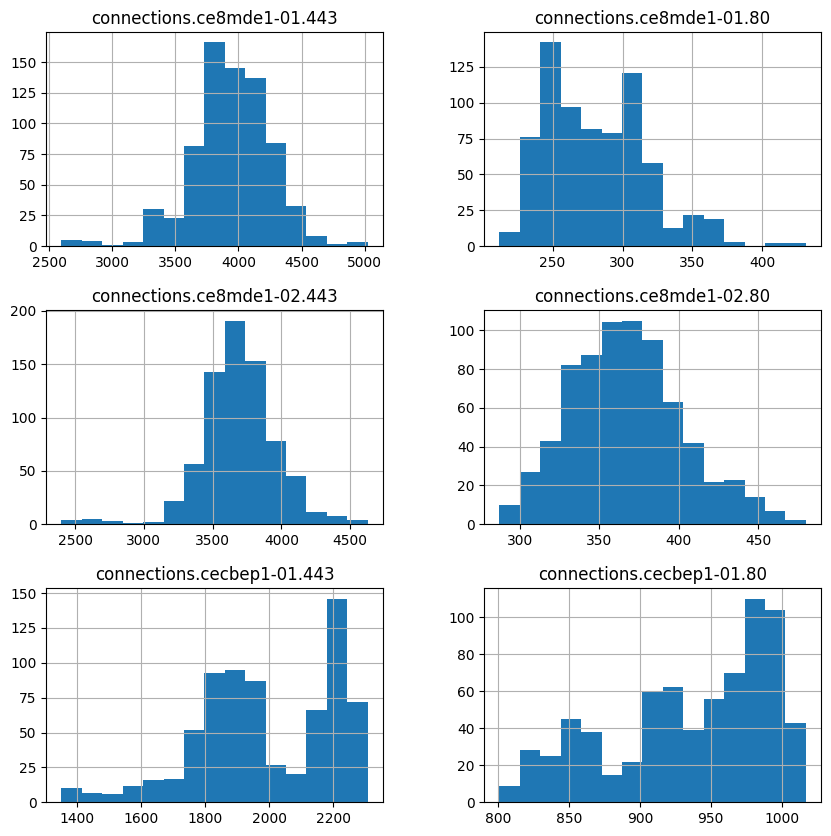

In [16]:
connections_df_hist = connections_df.iloc[:,1:7].hist(figsize=(10,10),bins=15)

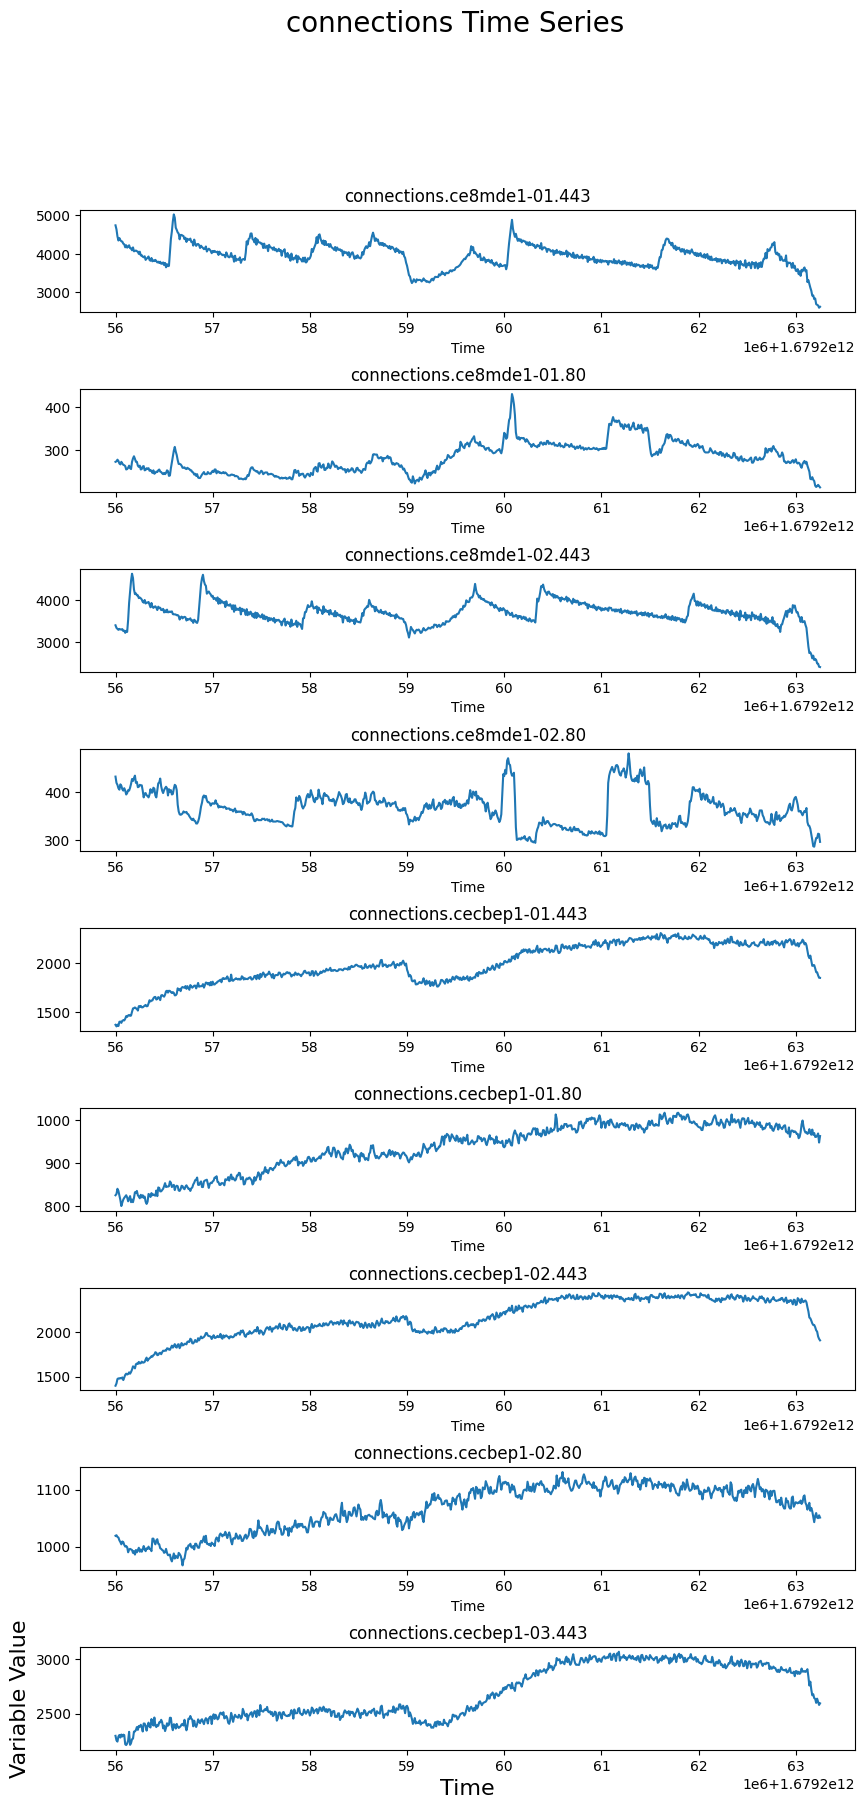

In [17]:
connections_df = pd.read_csv('connections_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
connections_df = connections_df.iloc[:,:9].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(connections_df.columns), figsize=(10, 20))
for i, column in enumerate(connections_df.columns):
    connections_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('connections Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

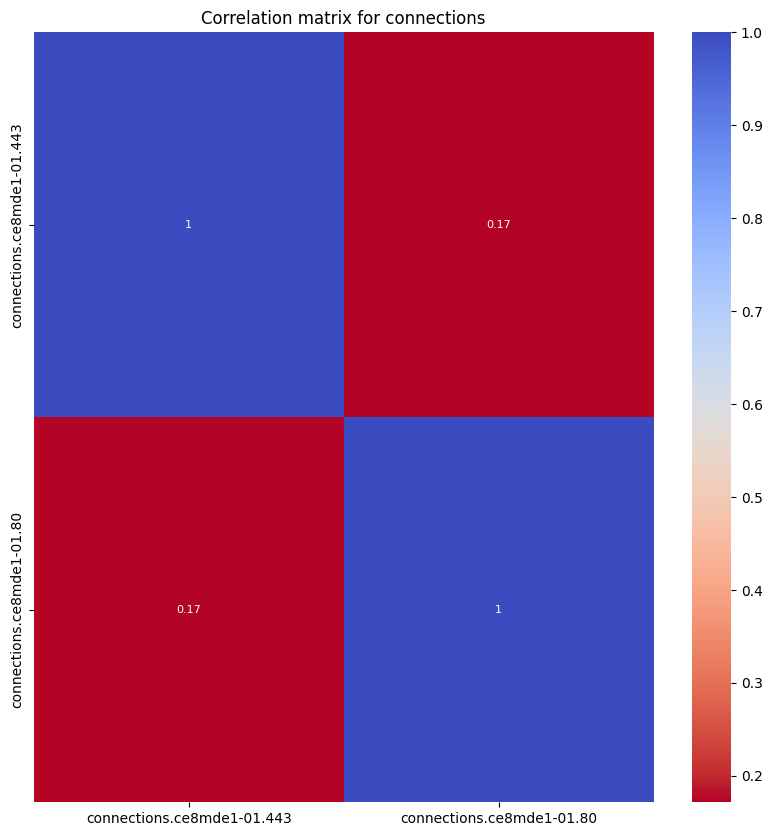

In [18]:
connections_df = pd.read_csv('connections_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_connections = connections_df.iloc[:,:2].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_connections, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for connections')
plt.show()

###DISK IOPS (number of reads/writes operations)

In [19]:
disk_iops_df.head()

Time  reads..ce8mde1-01  writes..ce8mde1-01  reads..ce8mde1-02  \
0  1679256010000              563.2               158.6              802.9   
1  1679256020000              423.0               205.1              568.7   
2  1679256030000              171.0               129.1              250.8   
3  1679256040000              153.1               608.7              174.1   
4  1679256050000              108.7               682.1               90.9   

   writes..ce8mde1-02  reads..cecbep1-01  writes..cecbep1-01  \
0               417.7              345.5                 1.5   
1               279.6              409.5               128.0   
2                 0.0              400.7               366.6   
3               779.4              374.7               421.9   
4                 0.0              298.1                27.5   

   reads..cecbep1-02  writes..cecbep1-02  reads..cecbep1-03  ...  \
0              526.2               526.7              632.8  ...   
1              636.9                 3.7              620.2  ...   
2              593.7                 3.9              623.5  ...   
3              545.5               244.1              594.7  ...   
4              481.9              1306.7              595.5  ...   

   reads..cypmno1-12  writes..cypmno1-12  reads..cypmno1-21  \
0                0.0                 4.7                0.1   
1                0.0                 1.0                0.0   
2                0.0                 0.6                0.2   
3                0.1                 4.5                0.1   
4                0.0                 0.8                0.1   

   writes..cypmno1-21  reads..cypmno1-22  writes..cypmno1-22  \
0                82.3                0.2                20.0   
1               259.6                0.1                 0.0   
2                54.9                0.1                20.6   
3               262.0                0.2                 0.0   
4               202.9                0.2                 9.8   

   reads..cypmno1-31  writes..cypmno1-31  reads..cypmno1-32  \
0                0.1                67.4              368.7   
1                0.2               161.6              102.8   
2                0.1                35.0               61.9   
3                0.0               165.2               35.4   
4                0.0               153.5               43.2   

   writes..cypmno1-32  
0               173.6  
1               600.6  
2               121.4  
3               631.7  
4               440.6  

[5 rows x 307 columns]

In [20]:
disk_iops_df.iloc[:,:7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                725 non-null    int64  
 1   reads..ce8mde1-01   725 non-null    float64
 2   writes..ce8mde1-01  725 non-null    float64
 3   reads..ce8mde1-02   725 non-null    float64
 4   writes..ce8mde1-02  725 non-null    float64
 5   reads..cecbep1-01   725 non-null    float64
 6   writes..cecbep1-01  725 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 39.8 KB


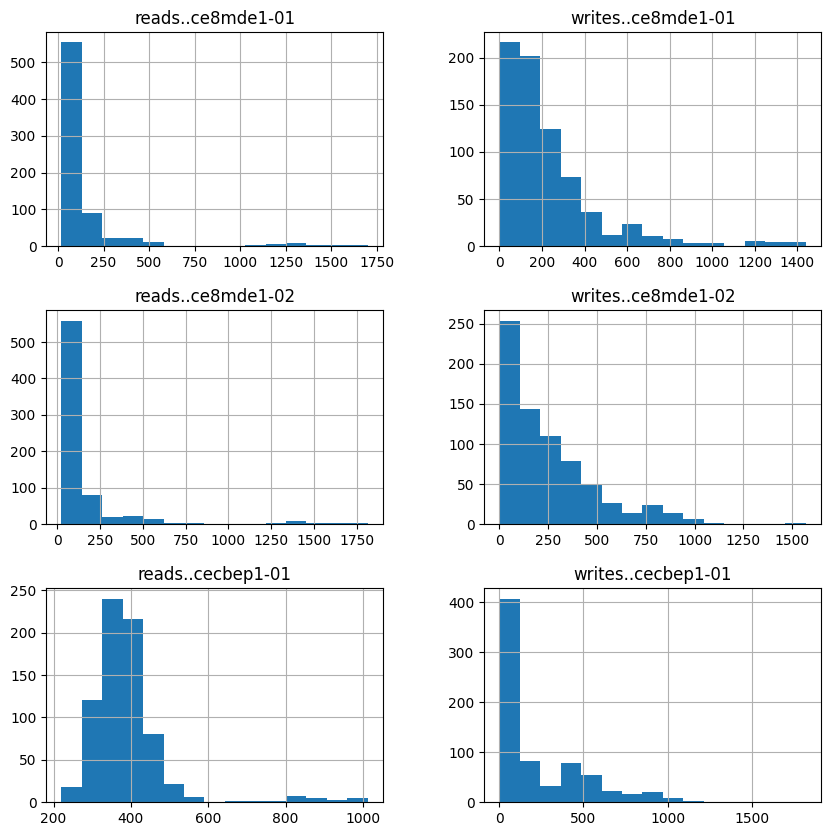

In [21]:
disk_iops_df_hist = disk_iops_df.iloc[:,1:7].hist(figsize=(10,10),bins=15)

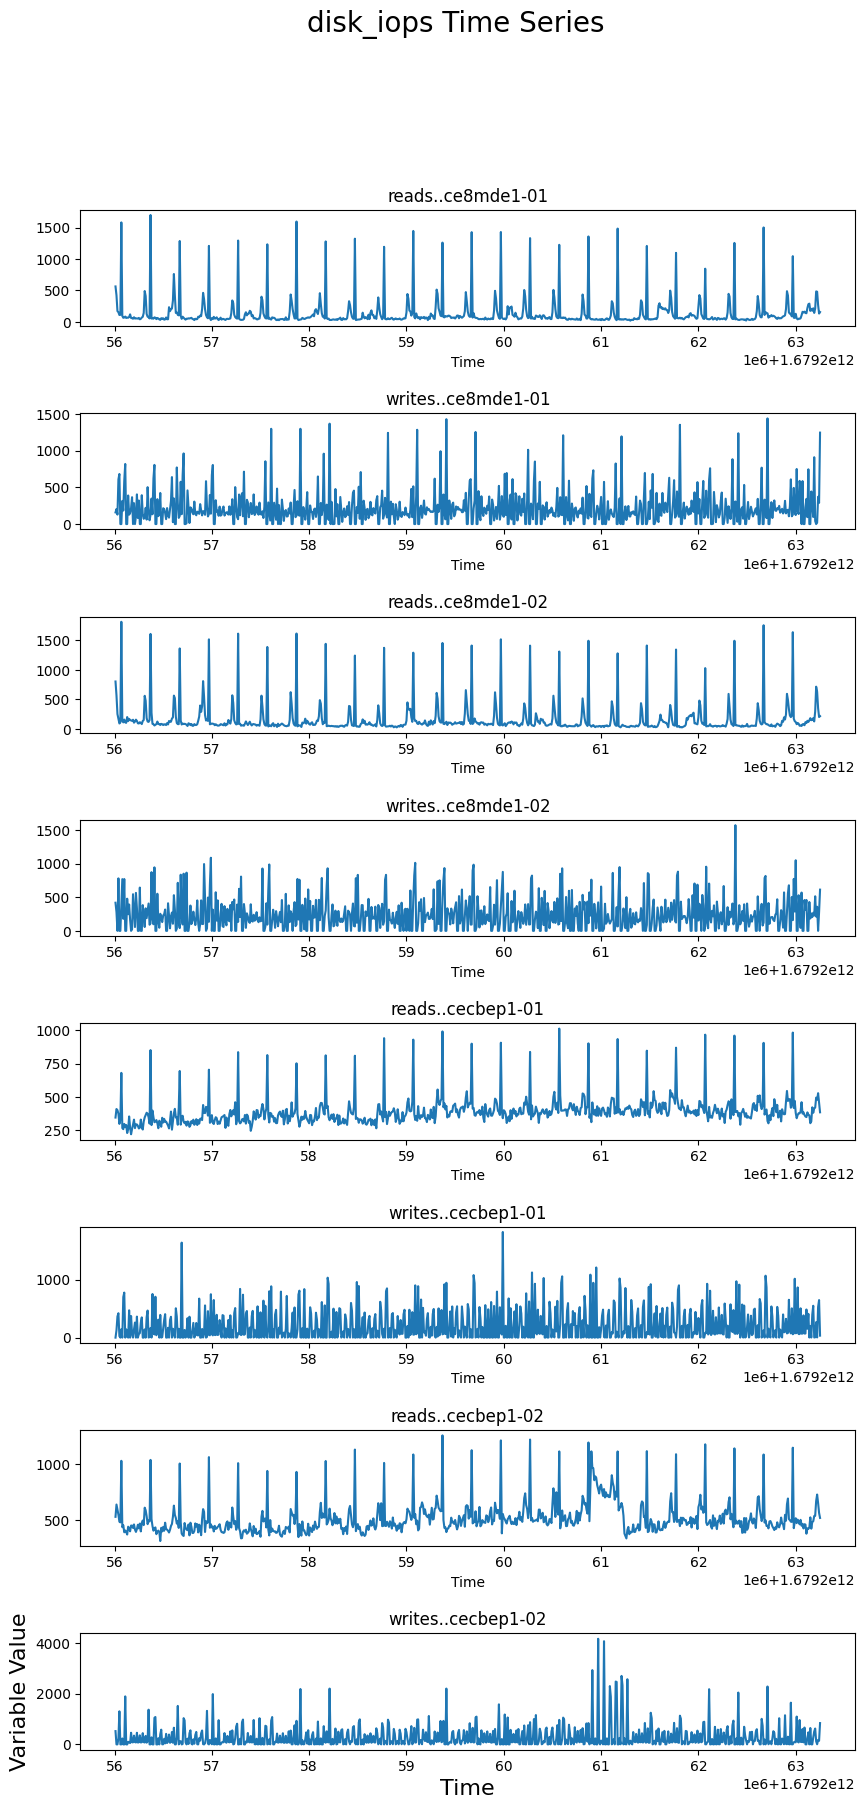

In [22]:
# Read in the dataset
disk_iops_df = pd.read_csv('disk_iops_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
disk_iops_df = disk_iops_df.iloc[:,:8].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(disk_iops_df.columns), figsize=(10, 20))
for i, column in enumerate(disk_iops_df.columns):
    disk_iops_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('disk_iops Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

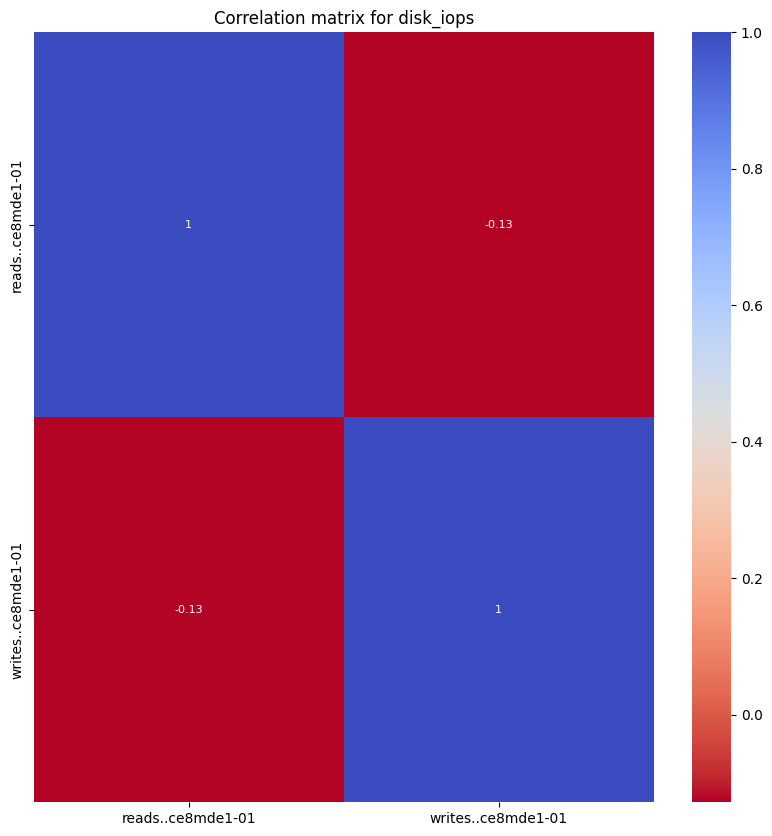

In [23]:
disk_iops_df = pd.read_csv('disk_iops_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_disk_iops = disk_iops_df.iloc[:,:2].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_disk_iops, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for disk_iops')
plt.show()

###DISK TIME (response times of reads/writes of the disk)

In [24]:
disk_time_df.head()

Time  reads..ce8mde1-01  writes..ce8mde1-01  reads..ce8mde1-02  \
0  1679256010000             5169.8               626.2            14152.0   
1  1679256020000             4182.7               198.9             6017.6   
2  1679256030000             1376.4               372.1             2376.1   
3  1679256040000             1383.1              3605.5             3604.6   
4  1679256050000             1312.8               655.5              833.3   

   writes..ce8mde1-02  reads..cecbep1-01  writes..cecbep1-01  \
0               423.3             3800.0                 0.1   
1               127.8             5228.4              1174.5   
2                 0.0             4145.6              1084.1   
3               943.6             5277.3              3388.2   
4                 0.0             3093.0               275.0   

   reads..cecbep1-02  writes..cecbep1-02  reads..cecbep1-03  ...  \
0            15420.6              5162.9             7983.1  ...   
1             7356.4                 0.5            16782.6  ...   
2             7559.6                 0.3             7591.8  ...   
3            15213.0              3146.7             7544.4  ...   
4            12678.7              7135.5            19987.2  ...   

   reads..cypmno1-12  writes..cypmno1-12  reads..cypmno1-21  \
0                0.0                 0.5                0.1   
1                0.0                 0.7                0.0   
2                0.0                 0.0                0.1   
3                0.1                 0.0                0.2   
4                0.0                 0.0                0.0   

   writes..cypmno1-21  reads..cypmno1-22  writes..cypmno1-22  \
0               116.1                0.2                 5.1   
1               156.8                0.1                 0.0   
2                56.2                0.2                 9.2   
3               663.4                0.2                 0.0   
4               301.7                0.2                 6.1   

   reads..cypmno1-31  writes..cypmno1-31  reads..cypmno1-32  \
0                0.0                60.7             1294.0   
1                3.9                80.3              665.9   
2                0.0                23.4              297.7   
3                0.0               228.9              232.0   
4                0.0               124.3              429.6   

   writes..cypmno1-32  
0               286.8  
1               489.6  
2               121.7  
3              1203.5  
4               407.2  

[5 rows x 299 columns]

In [25]:
disk_time_df.iloc[:,:7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                725 non-null    int64  
 1   reads..ce8mde1-01   725 non-null    float64
 2   writes..ce8mde1-01  725 non-null    float64
 3   reads..ce8mde1-02   725 non-null    float64
 4   writes..ce8mde1-02  725 non-null    float64
 5   reads..cecbep1-01   725 non-null    float64
 6   writes..cecbep1-01  725 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 39.8 KB


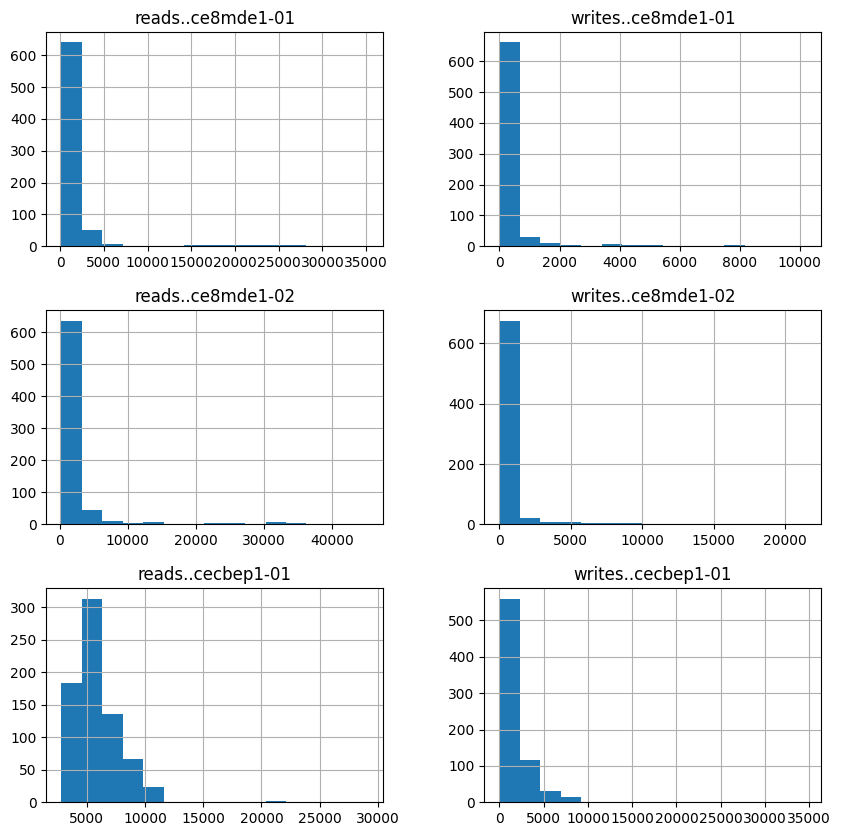

In [26]:
disk_time_df_hist = disk_time_df.iloc[:,1:7].hist(figsize=(10,10),bins=15)

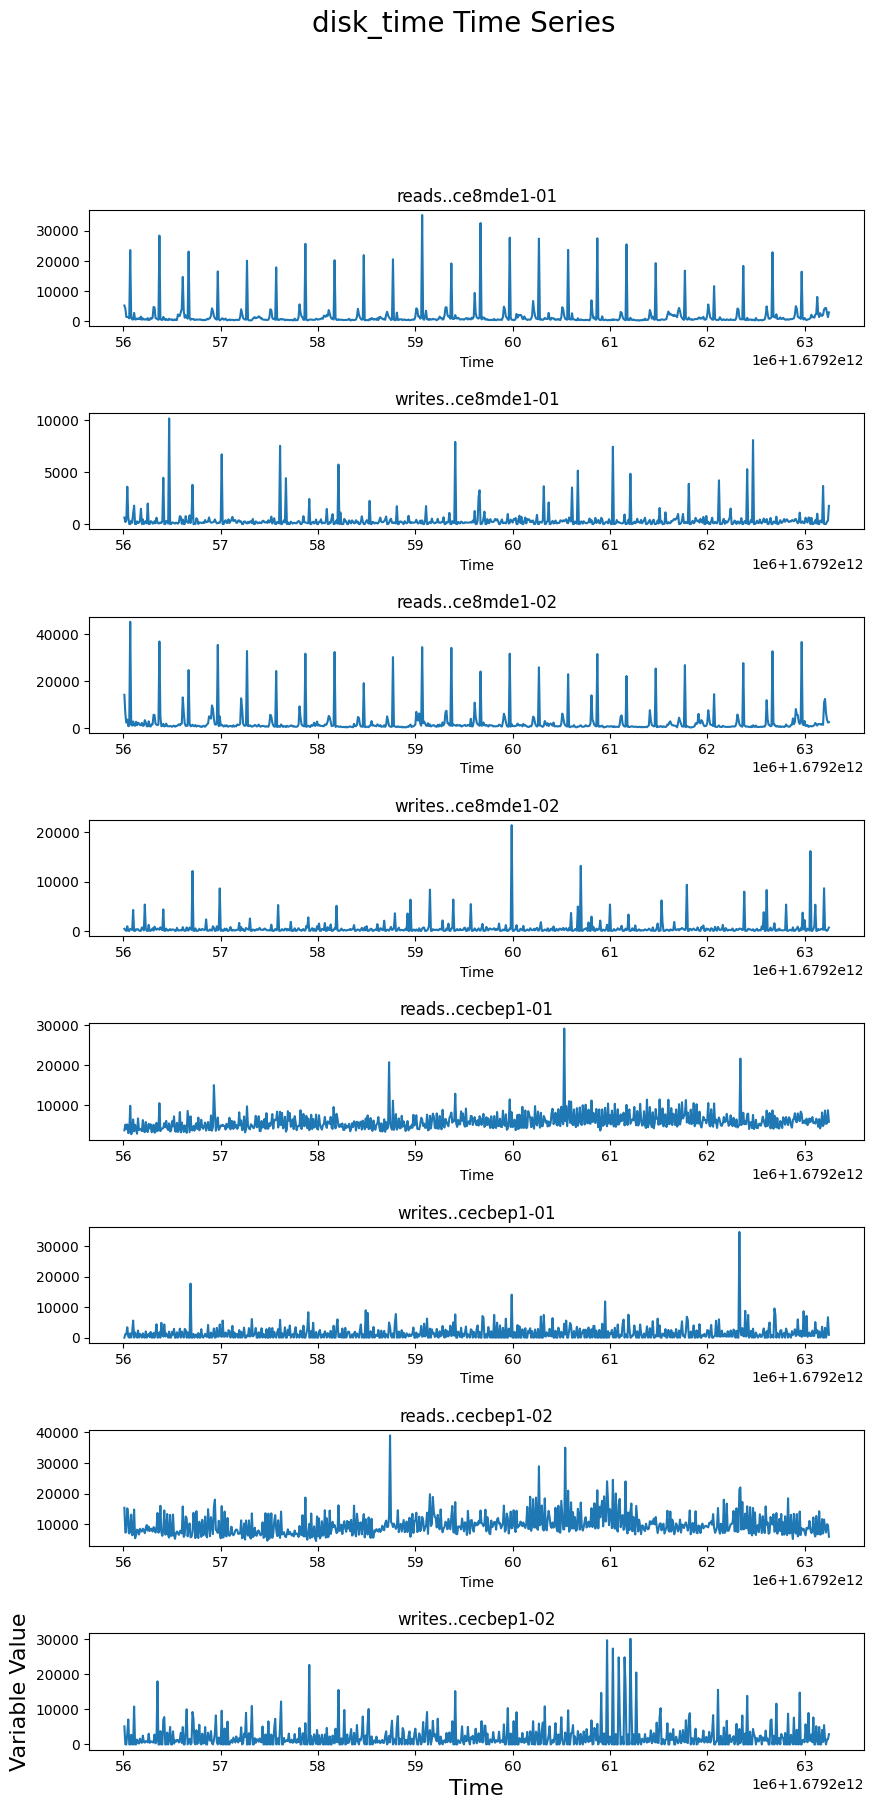

In [27]:
# Read in the dataset
disk_time_df = pd.read_csv('disk_time_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
disk_time_df = disk_time_df.iloc[:,:8].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(disk_time_df.columns), figsize=(10, 20))
for i, column in enumerate(disk_time_df.columns):
    disk_time_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('disk_time Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

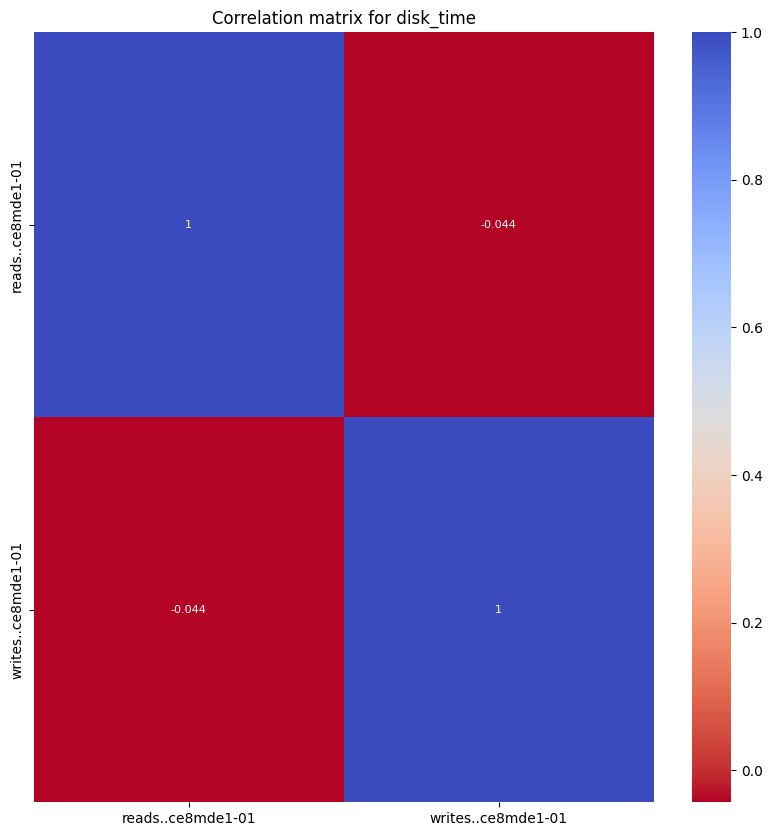

In [28]:
disk_time_df = pd.read_csv('disk_time_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_disk_time = disk_time_df.iloc[:,:2].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_disk_time, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for disk_time')
plt.show()

###DISK THROUGHPUT (bytes per second of reads/writes)

In [29]:
disk_throughput_df.head()

Time  reads..ce8mde1-01  writes..ce8mde1-01  reads..ce8mde1-02  \
0  1679256010000        164695244.8        5.068653e+08        370376704.0   
1  1679256020000        147999948.8        4.771906e+08        346266009.6   
2  1679256030000        177088102.4        3.613262e+08        292890214.4   
3  1679256040000        206294220.8        8.229814e+08        329986867.2   
4  1679256050000        239370240.0        1.193142e+09        240441753.6   

   writes..ce8mde1-02  reads..cecbep1-01  writes..cecbep1-01  \
0        1.223977e+09       1.366000e+09             49152.0   
1        9.161933e+06       1.329460e+09         412765388.8   
2        0.000000e+00       1.474465e+09          12012748.8   
3        1.727683e+09       1.350353e+09         482361344.0   
4        0.000000e+00       1.218318e+09          86107750.4   

   reads..cecbep1-02  writes..cecbep1-02  reads..cecbep1-03  ...  \
0       1.795814e+09        1.110734e+09       2.044536e+09  ...   
1       2.069391e+09        1.212416e+05       1.863146e+09  ...   
2       2.098777e+09        1.277952e+05       1.905338e+09  ...   
3       2.111511e+09        9.609019e+08       2.000719e+09  ...   
4       2.002688e+09        5.253923e+08       1.983191e+09  ...   

   reads..cypmno1-12  writes..cypmno1-12  reads..cypmno1-21  \
0                0.0           2247884.8             3276.8   
1                0.0           3581542.4                0.0   
2                0.0             19660.8             6553.6   
3             3276.8            167116.8             3276.8   
4                0.0             49152.0             3276.8   

   writes..cypmno1-21  reads..cypmno1-22  writes..cypmno1-22  \
0         249099059.2             6553.6          19667353.6   
1         147269222.4             3276.8                 0.0   
2         131812556.8             3276.8          27498905.6   
3         779147673.6             6553.6                 0.0   
4         161867366.4             6553.6          23271833.6   

   reads..cypmno1-31  writes..cypmno1-31  reads..cypmno1-32  \
0             3276.8         186676019.2        116745830.4   
1            22937.6          86750003.2         89561497.6   
2             3276.8          74697932.8         43912396.8   
3                0.0         490684416.0         25542656.0   
4                0.0         182871654.4         75795660.8   

   writes..cypmno1-32  
0        5.340365e+08  
1        4.971201e+08  
2        2.856550e+08  
3        1.912619e+09  
4        4.519920e+08  

[5 rows x 307 columns]

In [30]:
disk_throughput_df.iloc[:,:7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                725 non-null    int64  
 1   reads..ce8mde1-01   725 non-null    float64
 2   writes..ce8mde1-01  725 non-null    float64
 3   reads..ce8mde1-02   725 non-null    float64
 4   writes..ce8mde1-02  725 non-null    float64
 5   reads..cecbep1-01   725 non-null    float64
 6   writes..cecbep1-01  725 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 39.8 KB


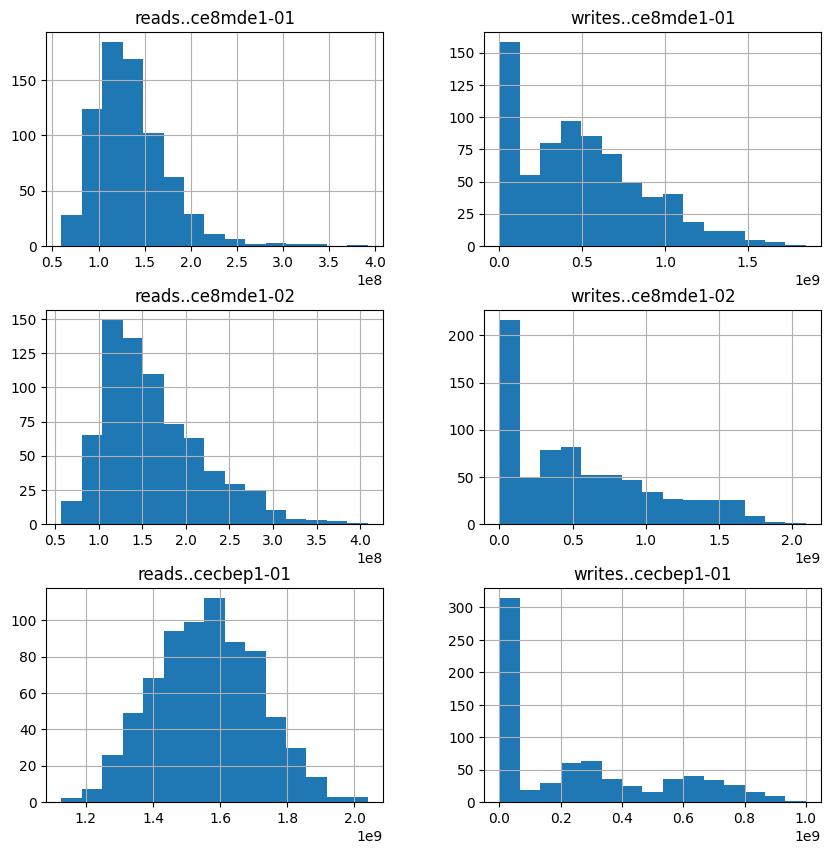

In [31]:
disk_throughput_df_hist = disk_throughput_df.iloc[:,1:7].hist(figsize=(10,10),bins=15)

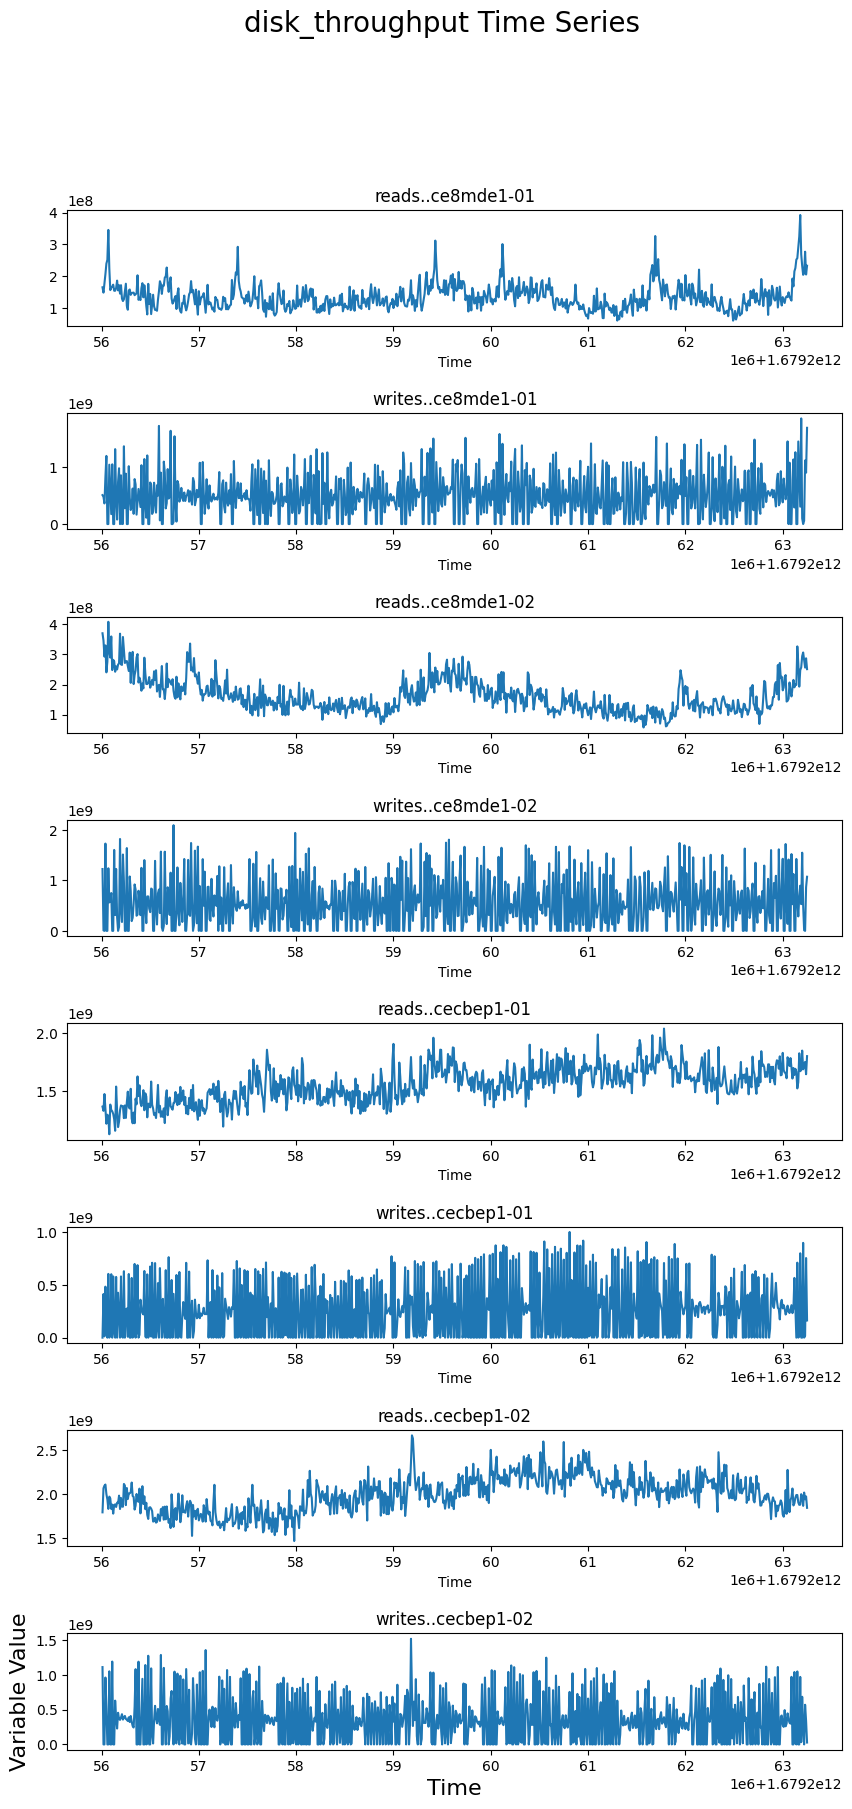

In [32]:
# Read in the dataset
disk_throughput_df = pd.read_csv('disk_troughput_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
disk_throughput_df = disk_throughput_df.iloc[:,:8].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(disk_throughput_df.columns), figsize=(10, 20))
for i, column in enumerate(disk_throughput_df.columns):
    disk_throughput_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('disk_throughput Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

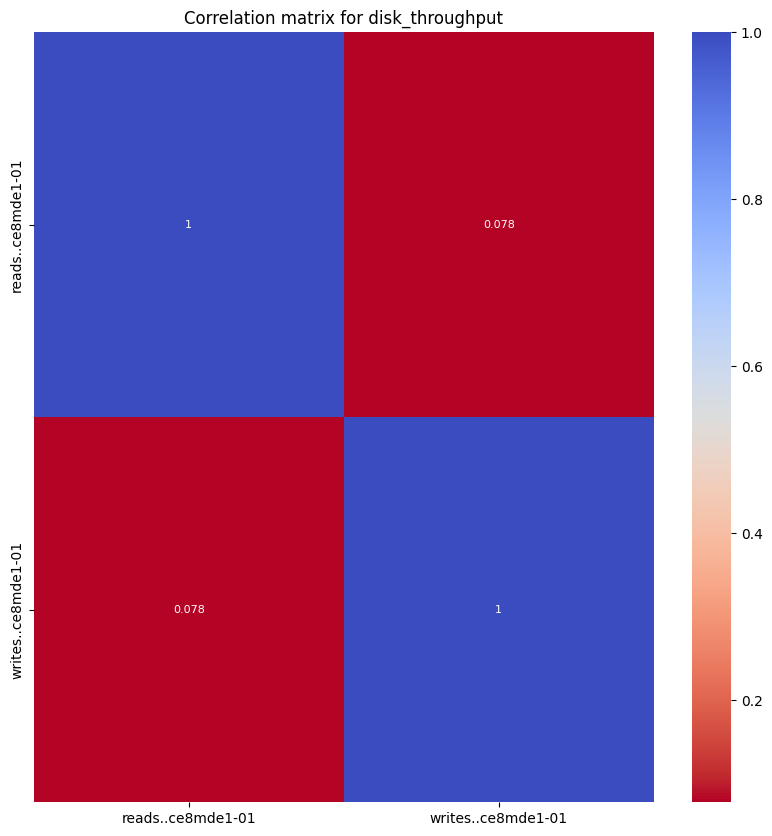

In [33]:
disk_throughput_df = pd.read_csv('disk_troughput_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_disk_throughput = disk_throughput_df.iloc[:,:2].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_disk_throughput, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for disk_throughput')
plt.show()

###DISK USE (% of disk used)

In [34]:
disk_use_df.head()

Time  io_time.ce8mde1-01.  io_time.ce8mde1-02.  \
0  1679256010000                49.07                66.83   
1  1679256020000                43.82                49.54   
2  1679256030000                23.79                30.76   
3  1679256040000                29.30                51.31   
4  1679256050000                37.74                21.37   

   io_time.cecbep1-01.  io_time.cecbep1-02.  io_time.cecbep1-03.  \
0                60.19                73.04                74.49   
1                61.65                72.95                75.67   
2                63.28                73.48                72.74   
3                62.53                77.37                72.21   
4                60.21                73.35                79.51   

   io_time.cecbep1-04.  io_time.cecbep1-06.md50  io_time.cecbep1-07.md50  \
0                80.76                     0.02                     0.64   
1                82.99                    -1.59                     2.78   
2                78.29                     1.51                    -2.71   
3                81.19                     0.55                     2.07   
4                81.10                    -2.54                    -2.00   

   io_time.cecbep1-08.md50  ...  io_time.cwfhta1-03.  io_time.cwfmpe1-01.  \
0                     3.35  ...                48.13                 8.69   
1                    -1.23  ...                39.72                20.20   
2                     3.52  ...                35.51                22.22   
3                    -4.31  ...                34.02                26.79   
4                    -0.03  ...                47.92                24.27   

   io_time.cwfmpe1-02.  io_time.cwfmpe1-03.  io_time.cypmno1-11.  \
0                31.13                42.90                 0.18   
1                21.88                23.39                 0.14   
2                16.86                24.00                 0.13   
3                12.13                41.13                 0.23   
4                13.91                23.88                 0.26   

   io_time.cypmno1-12.  io_time.cypmno1-21.  io_time.cypmno1-22.  \
0                 0.06                 0.79                 0.11   
1                 0.02                 0.57                 0.02   
2                 0.04                 0.57                 0.13   
3                 0.04                 2.11                 0.04   
4                 0.03                 0.74                 0.11   

   io_time.cypmno1-31.  io_time.cypmno1-32.  
0                 0.66                31.74  
1                 0.79                20.54  
2                 0.34                11.04  
3                 1.64                13.49  
4                 1.25                14.68  

[5 rows x 150 columns]

In [35]:
disk_use_df.iloc[:,:7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 725 non-null    int64  
 1   io_time.ce8mde1-01.  725 non-null    float64
 2   io_time.ce8mde1-02.  725 non-null    float64
 3   io_time.cecbep1-01.  725 non-null    float64
 4   io_time.cecbep1-02.  725 non-null    float64
 5   io_time.cecbep1-03.  725 non-null    float64
 6   io_time.cecbep1-04.  725 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 39.8 KB


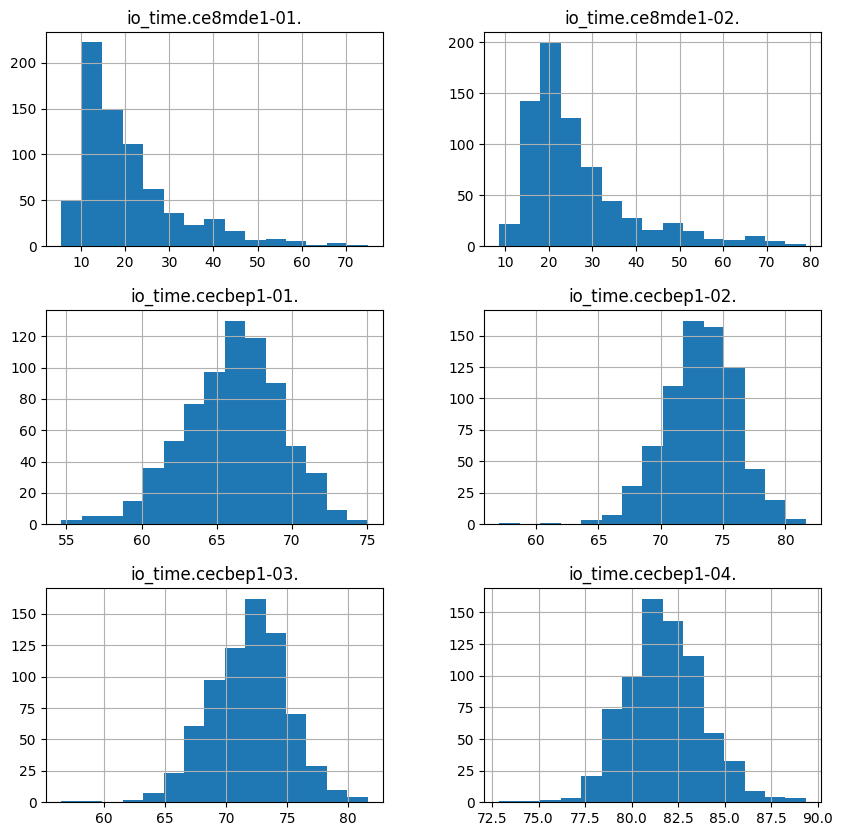

In [36]:
disk_use_df_hist = disk_use_df.iloc[:,1:7].hist(figsize=(10,10),bins=15)

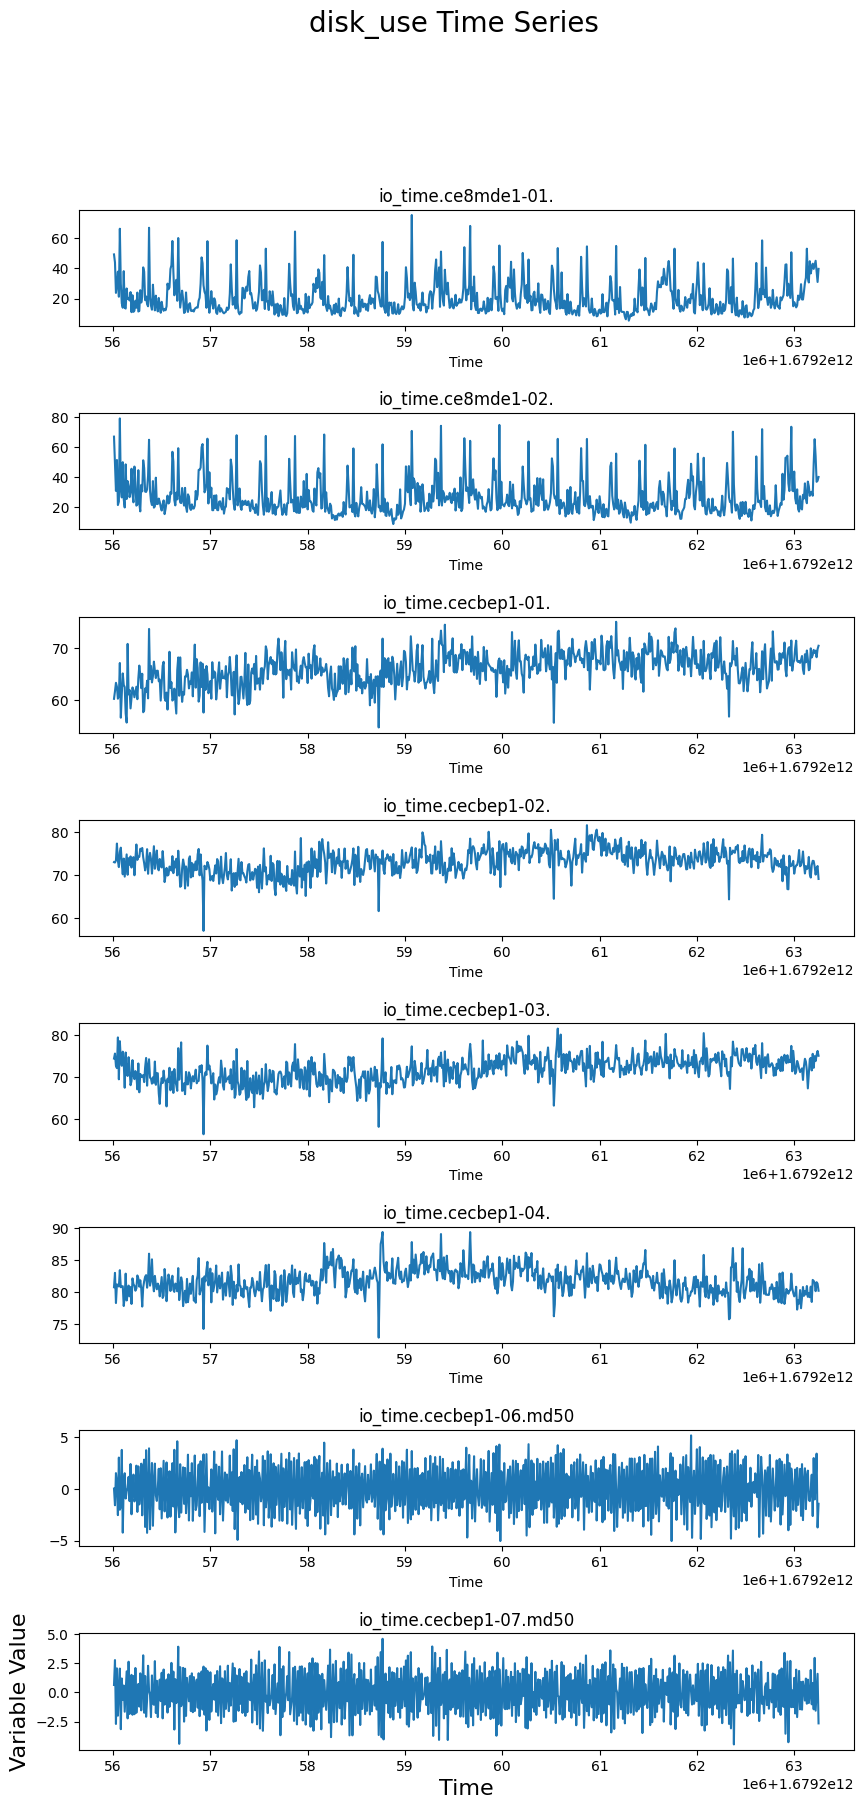

In [37]:
# Read in the dataset
disk_use_df = pd.read_csv('disk_use_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
disk_use_df = disk_use_df.iloc[:,:8].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(disk_use_df.columns), figsize=(10, 20))
for i, column in enumerate(disk_use_df.columns):
    disk_use_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('disk_use Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

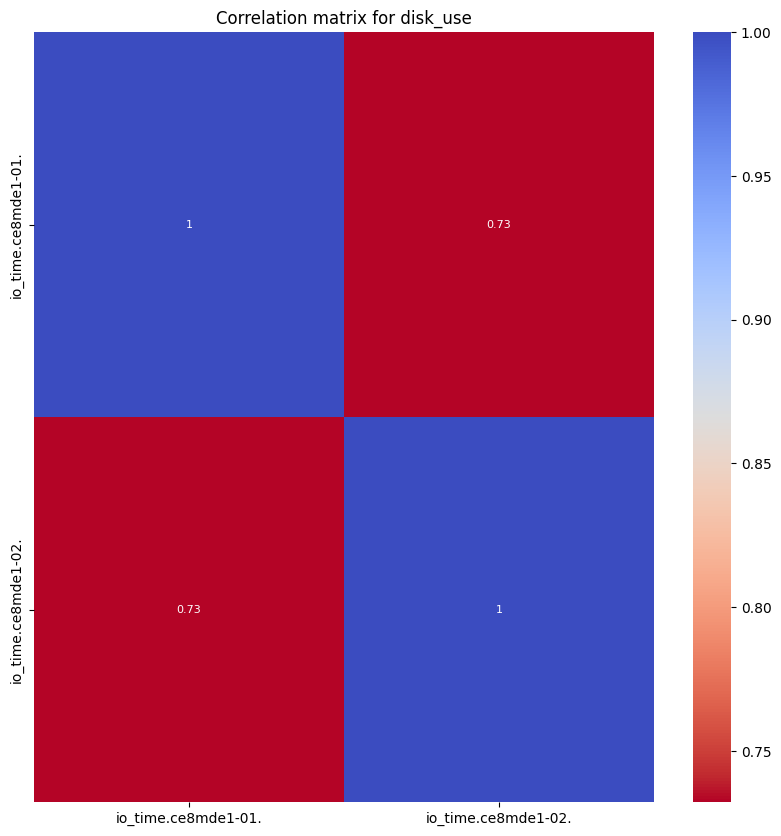

In [38]:
disk_use_df = pd.read_csv('disk_use_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_disk_use = disk_use_df.iloc[:,:2].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_disk_use, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for disk_use')
plt.show()

###NETWORK (throughput in bytes (not bytes/sec) I guess??)

In [39]:
network_df.head()

Time  rx.svc.ce8mde1-01  tx.svc.ce8mde1-01  rx.svc.160.ce8mde1-01  \
0  1679256010000        715863737.6       8.316772e+09                18348.0   
1  1679256020000        657906480.0       7.972341e+09                18220.0   
2  1679256030000        675512906.4       8.306773e+09                20349.6   
3  1679256040000        663657258.4       7.217257e+09                24016.0   
4  1679256050000        604779850.4       7.957306e+09                23948.0   

   tx.svc.160.ce8mde1-01  rx.svc.161.ce8mde1-01  tx.svc.161.ce8mde1-01  \
0               649797.6            635520986.4           7.647296e+09   
1               492137.6            609682488.8           7.486072e+09   
2               676996.8            576557948.0           7.782888e+09   
3               675220.0            621014790.4           7.455788e+09   
4               742739.2            597732872.0           7.512986e+09   

   rx.svc.193.ce8mde1-01  tx.svc.193.ce8mde1-01  rx.svc_0.ce8mde1-01  ...  \
0                      0                      0          363843248.0  ...   
1                      0                      0          312799216.8  ...   
2                      0                      0          348211750.4  ...   
3                      0                      0          358478033.6  ...   
4                      0                      0          268123191.2  ...   

   rx.svc.401.cypmno1-32  tx.svc.401.cypmno1-32  rx.svc.402.cypmno1-32  \
0            683593044.8           4.701528e+09                      0   
1            732506866.4           4.663199e+09                      0   
2            785561169.6           4.794911e+09                      0   
3            680228144.0           4.391067e+09                      0   
4            676722614.4           4.511035e+09                      0   

   tx.svc.402.cypmno1-32  rx.svc.403.cypmno1-32  tx.svc.403.cypmno1-32  \
0                      0                31337.6               941236.0   
1                      0                37841.6              1100148.8   
2                      0                36586.4              1033050.4   
3                      0                34300.0               975481.6   
4                      0                34280.8               985391.2   

   rx.svc_0.cypmno1-32  tx.svc_0.cypmno1-32  rx.svc_1.cypmno1-32  \
0          356023785.6         2.392624e+09          353635541.6   
1          396561379.2         2.387696e+09          363772290.4   
2          424767242.4         2.453901e+09          390471931.2   
3          387416499.2         2.367352e+09          318625793.6   
4          370061425.6         2.407569e+09          332370947.2   

   tx.svc_1.cypmno1-32  
0         2.512473e+09  
1         2.477776e+09  
2         2.548977e+09  
3         2.213884e+09  
4         2.299015e+09  

[5 rows x 2179 columns]

In [40]:
network_df.iloc[:,:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   725 non-null    int64  
 1   rx.svc.ce8mde1-01      725 non-null    float64
 2   tx.svc.ce8mde1-01      725 non-null    float64
 3   rx.svc.160.ce8mde1-01  725 non-null    float64
 4   tx.svc.160.ce8mde1-01  725 non-null    float64
 5   rx.svc.161.ce8mde1-01  725 non-null    float64
 6   tx.svc.161.ce8mde1-01  725 non-null    float64
 7   rx.svc.193.ce8mde1-01  725 non-null    int64  
 8   tx.svc.193.ce8mde1-01  725 non-null    int64  
 9   rx.svc_0.ce8mde1-01    725 non-null    float64
 10  tx.svc_0.ce8mde1-01    725 non-null    float64
 11  rx.svc_1.ce8mde1-01    725 non-null    float64
 12  tx.svc_1.ce8mde1-01    725 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 73.8 KB


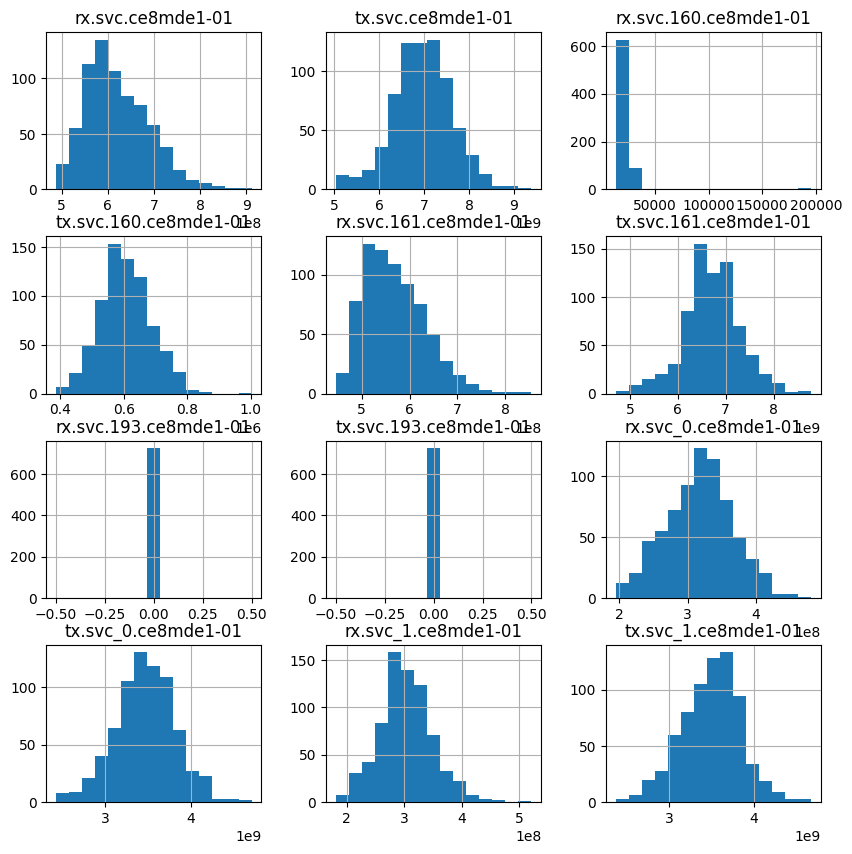

In [41]:
network_df_hist = network_df.iloc[:,1:13].hist(figsize=(10,10),bins=15)

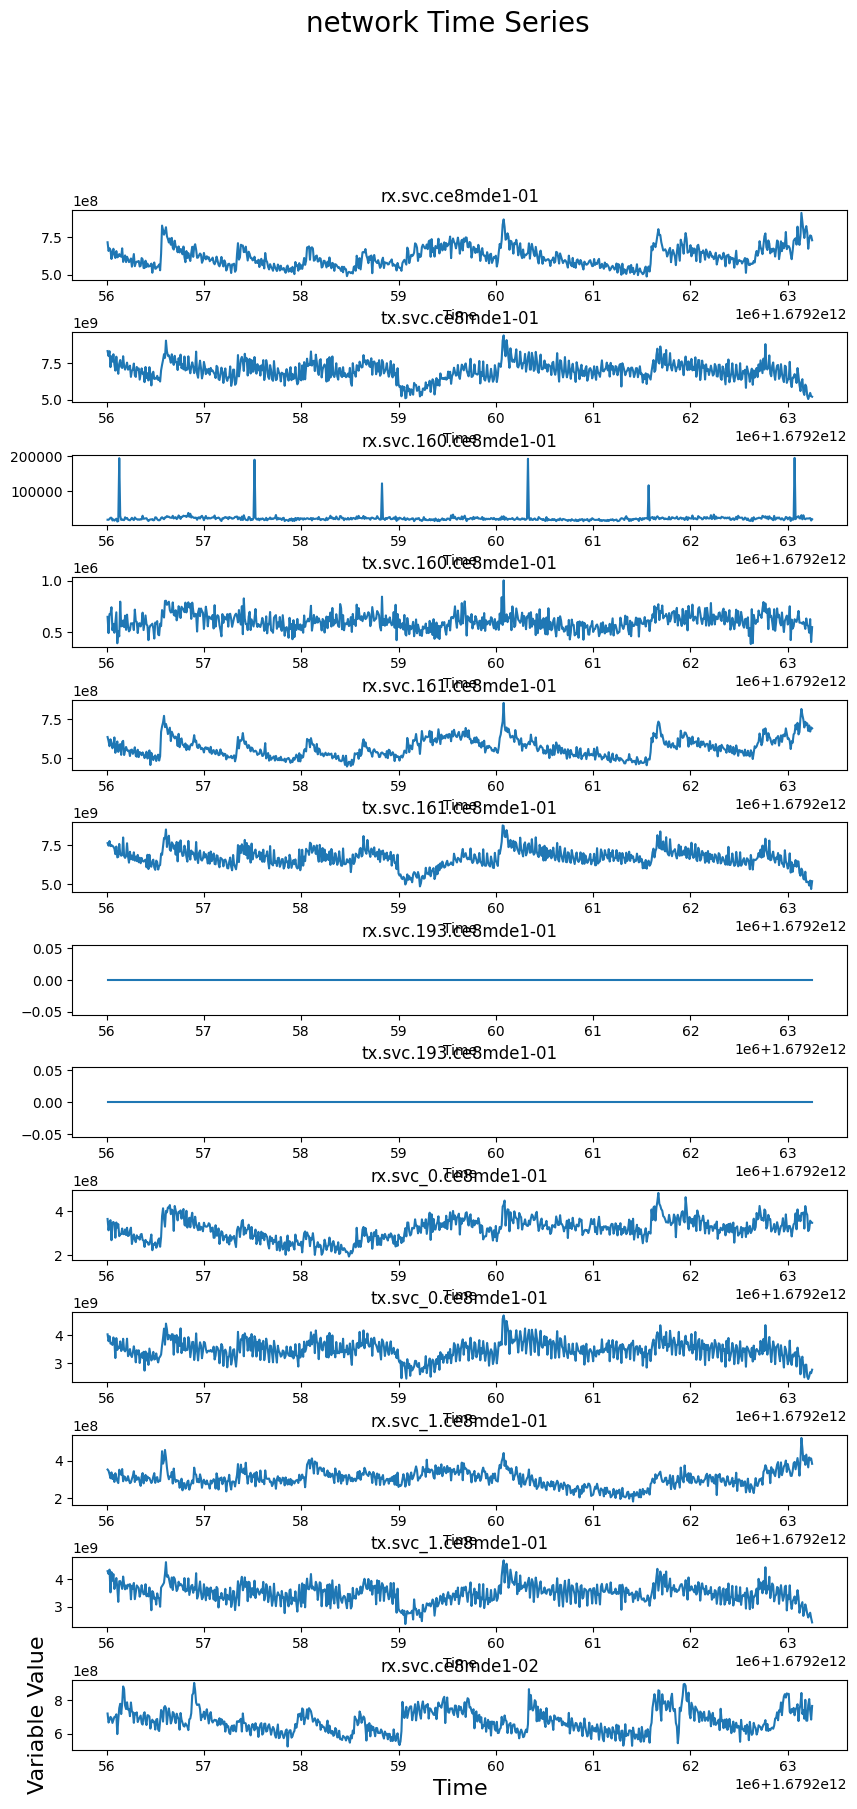

In [42]:
# Read in the dataset
network_df = pd.read_csv('network_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
network_df = network_df.iloc[:,:13].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(network_df.columns), figsize=(10, 20))
for i, column in enumerate(network_df.columns):
    network_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('network Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

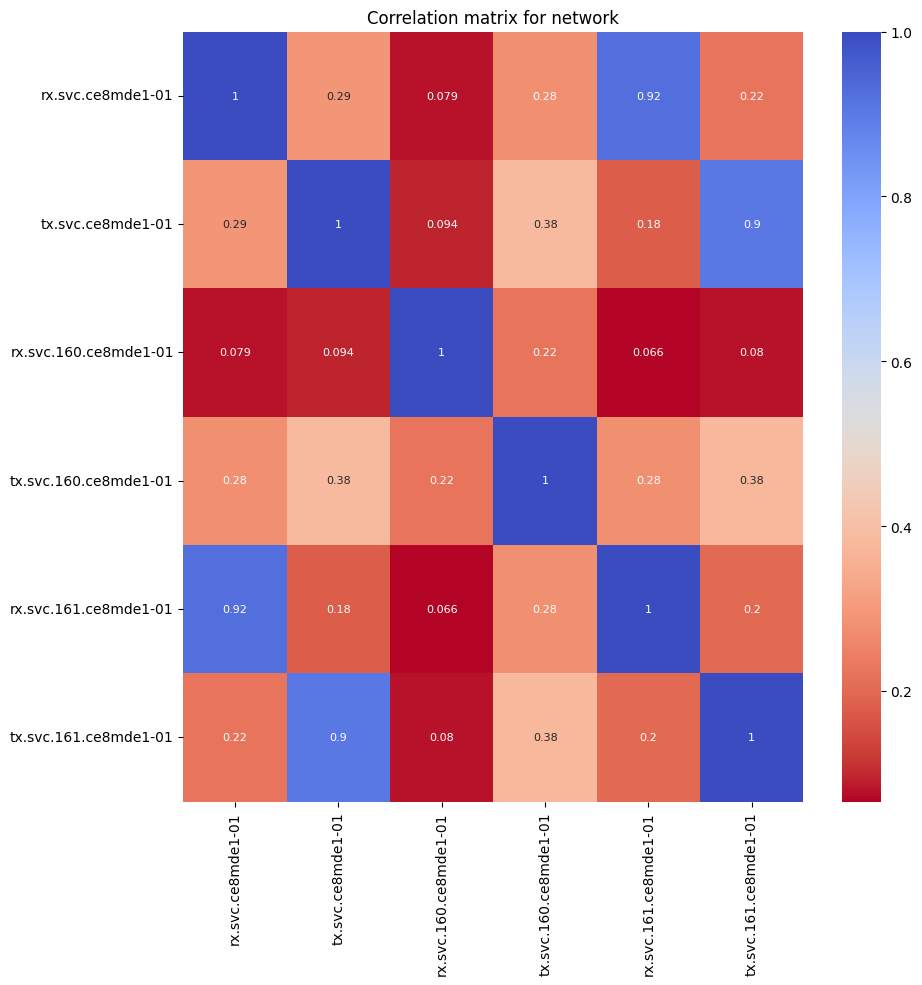

In [43]:
network_df = pd.read_csv('network_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_network = network_df.iloc[:,:6].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_network, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for network')
plt.show()

###TOTAL REQUEST (Number of connections)

In [44]:
total_request_df.head(8)

Time  request.ce8mde1-01.live.dash  request.ce8mde1-01.live.hls  \
0  1679256000000                        9681.0                       3771.0   
1  1679256005000                           NaN                          NaN   
2  1679256010000                           NaN                          NaN   
3  1679256015000                           NaN                          NaN   
4  1679256020000                           NaN                          NaN   
5  1679256025000                           NaN                          NaN   
6  1679256030000                        9546.0                       3247.0   
7  1679256035000                           NaN                          NaN   

   request.ce8mde1-01.live.smooth  request.ce8mde1-01.live.unknown  \
0                           701.0                              NaN   
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   
6                           679.0                              NaN   
7                             NaN                              NaN   

   request.ce8mde1-01.vod.http  request.ce8mde1-01.vod.unknown  \
0                        131.0                             NaN   
1                          NaN                             NaN   
2                          NaN                             NaN   
3                          NaN                             NaN   
4                          NaN                             NaN   
5                          NaN                             NaN   
6                        124.0                             NaN   
7                          NaN                             NaN   

   request.ce8mde1-02.live.dash  request.ce8mde1-02.live.hls  \
0                        7871.0                       1182.0   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   
5                           NaN                          NaN   
6                        7816.0                       1061.0   
7                           NaN                          NaN   

   request.ce8mde1-02.live.smooth  ...  request.ceimsm1-17.vod.unknown  \
0                          2527.0  ...                          2559.0   
1                             NaN  ...                             NaN   
2                             NaN  ...                             NaN   
3                             NaN  ...                             NaN   
4                             NaN  ...                             NaN   
5                             NaN  ...                             NaN   
6                          2490.0  ...                          2789.0   
7                             NaN  ...                             NaN   

   request.ceimsm1-18.live.dash  request.ceimsm1-18.live.hls  \
0                        6613.0                       2796.0   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   
5                           NaN                          NaN   
6                        6709.0                       2601.0   
7                           NaN                          NaN   

   request.ceimsm1-18.live.smooth  request.ceimsm1-18.live.unknown  \
0                           361.0                              NaN   
1                             NaN                              NaN   
2                             NaN          

In [45]:
total_request_df.iloc[:,:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time                             1452 non-null   int64  
 1   request.ce8mde1-01.live.dash     242 non-null    float64
 2   request.ce8mde1-01.live.hls      242 non-null    float64
 3   request.ce8mde1-01.live.smooth   242 non-null    float64
 4   request.ce8mde1-01.live.unknown  31 non-null     float64
 5   request.ce8mde1-01.vod.http      192 non-null    float64
 6   request.ce8mde1-01.vod.unknown   6 non-null      float64
 7   request.ce8mde1-02.live.dash     242 non-null    float64
 8   request.ce8mde1-02.live.hls      242 non-null    float64
 9   request.ce8mde1-02.live.smooth   242 non-null    float64
 10  request.ce8mde1-02.live.unknown  36 non-null     float64
 11  request.ce8mde1-02.vod.http      215 non-null    float64
 12  request.ce8mde1-02.v

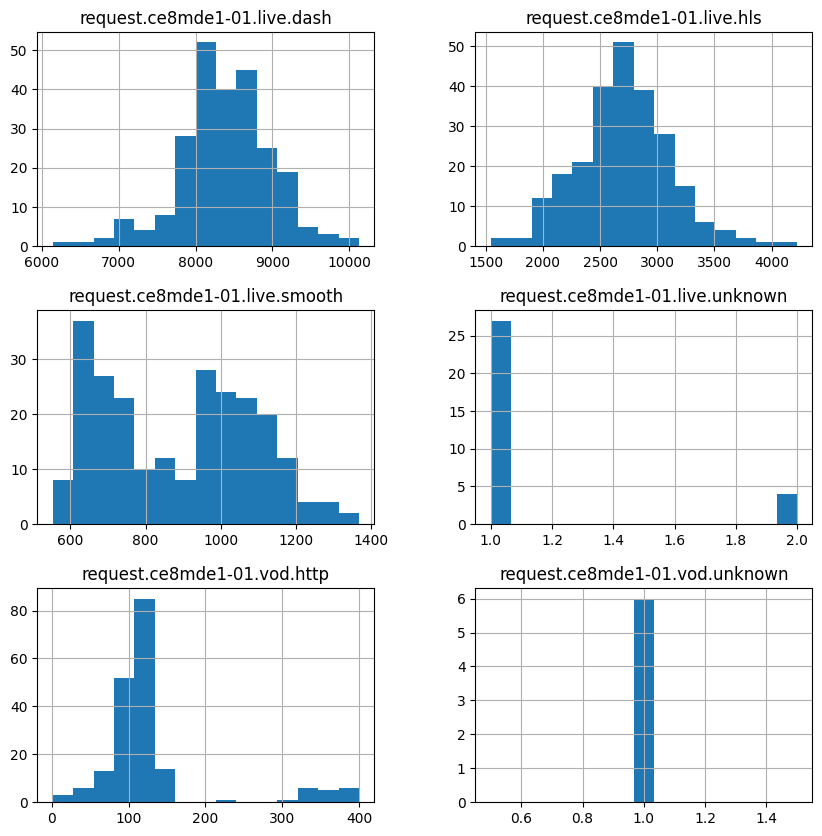

In [46]:
total_request_df_hist = total_request_df.iloc[:,1:7].hist(figsize=(10,10),bins=15)

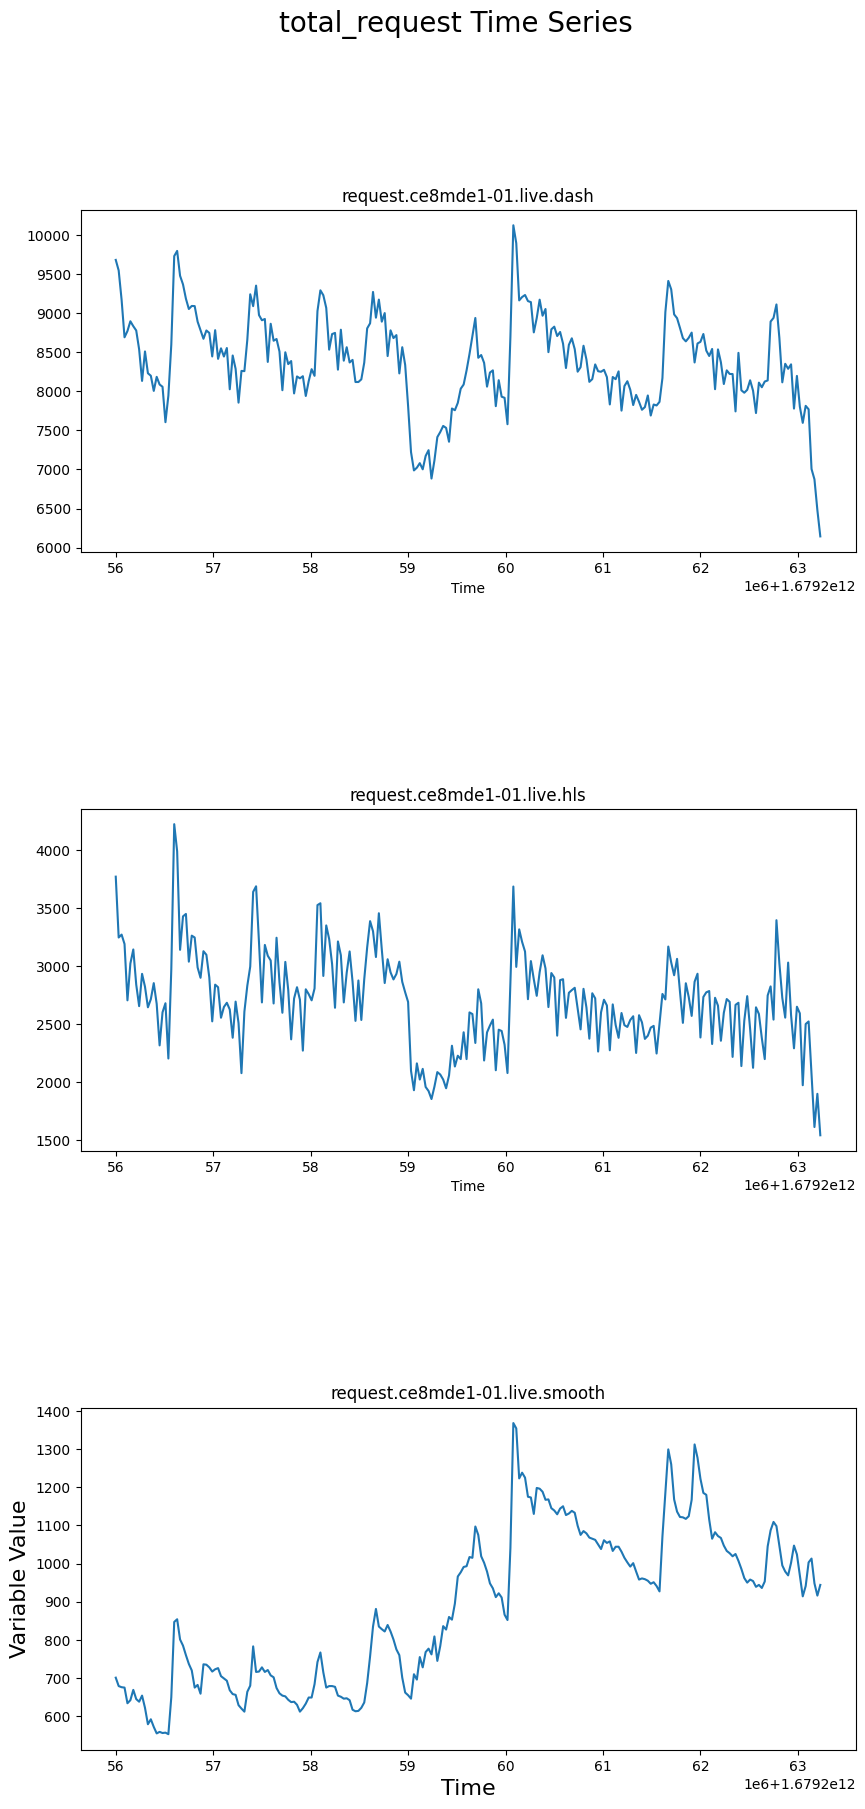

In [47]:
# Read in the dataset
total_request_df = pd.read_csv('total_request_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
total_request_df = total_request_df.iloc[:,[0,1,2]].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(total_request_df.columns), figsize=(10, 20))
for i, column in enumerate(total_request_df.columns):
    total_request_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('total_request Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

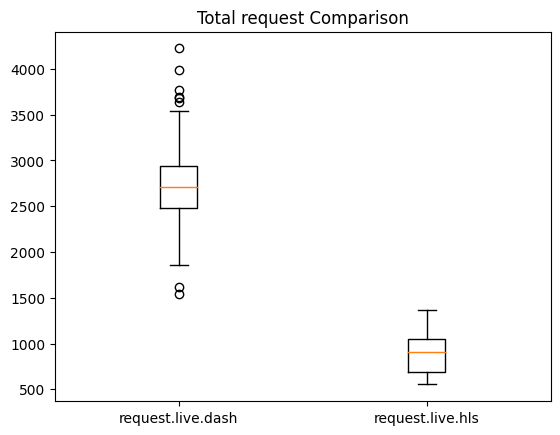

In [48]:
fig1, ax1 = pyplot.subplots()
dat = [total_request_df.iloc[:,1], total_request_df.iloc[:,2]]
ax1.set_title('Total request Comparison')
ax1.boxplot(dat, labels = ["request.live.dash", "request.live.hls"])
pyplot.show()

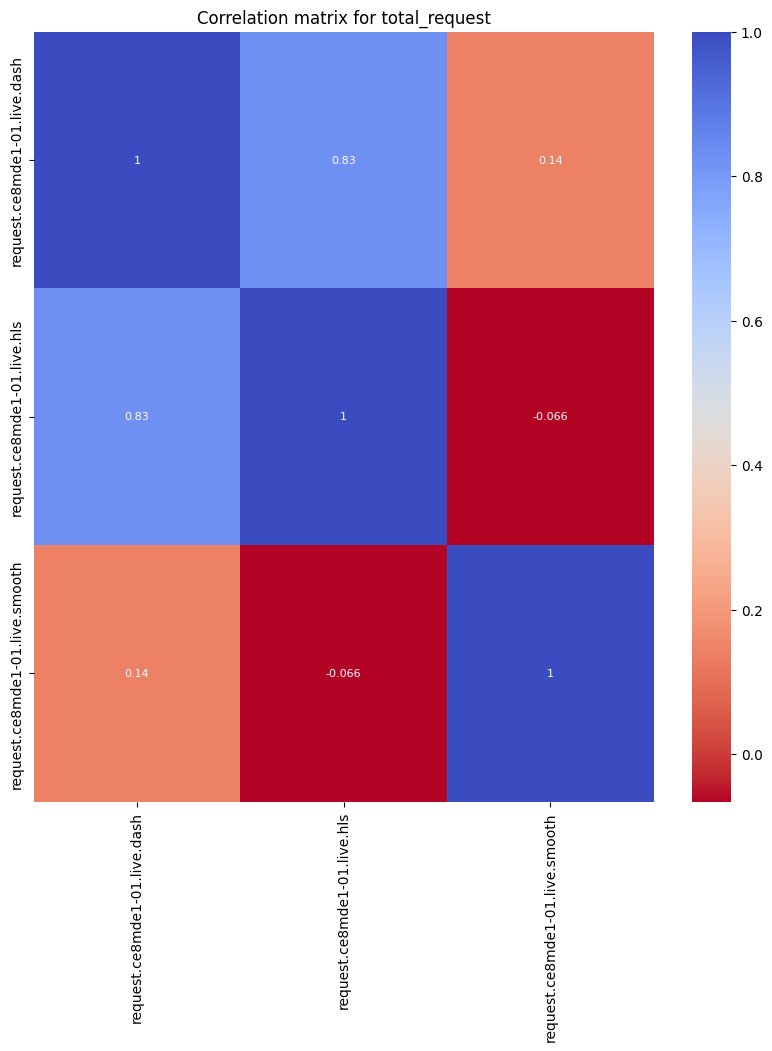

In [49]:
total_request_df = pd.read_csv('total_request_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_total_request = total_request_df.iloc[:,[0,1,2]].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_total_request, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for total_request')
plt.show()

###AVG BITRATE (bits/sec of the quality of the video streaming)

In [66]:
avg_bitrate_df.head(8)

live.dash     live.hls  live.smooth  live.unknown  vod.http  \
Time                                                                          
1679256000000  2456556.75  1684077.625    4917505.5           NaN       0.0   
1679256005000         NaN          NaN          NaN           NaN       NaN   
1679256010000         NaN          NaN          NaN           NaN       NaN   
1679256015000         NaN          NaN          NaN           NaN       NaN   
1679256020000         NaN          NaN          NaN           NaN       NaN   
1679256025000         NaN          NaN          NaN           NaN       NaN   
1679256030000  2453651.25  1761678.500    5156796.5           NaN       0.0   
1679256035000         NaN          NaN          NaN           NaN       NaN   

               vod.unknown  live.dash.1   live.hls.1  live.smooth.1  \
Time                                                                  
1679256000000          NaN   2406720.75  1790439.875      5662731.5   
1679256005000          NaN          NaN          NaN            NaN   
1679256010000          NaN          NaN          NaN            NaN   
1679256015000          NaN          NaN          NaN            NaN   
1679256020000          NaN          NaN          NaN            NaN   
1679256025000          NaN          NaN          NaN            NaN   
1679256030000          NaN   2404197.00  1894717.000      5762870.0   
1679256035000          NaN          NaN          NaN            NaN   

               live.unknown.1  ...  vod.unknown.82  live.dash.89  live.hls.89  \
Time                           ...                                              
1679256000000             NaN  ...             0.0     2544668.0   1913841.25   
1679256005000             NaN  ...             NaN           NaN          NaN   
1679256010000             NaN  ...             NaN           NaN          NaN   
1679256015000             NaN  ...             NaN           NaN          NaN   
1679256020000             NaN  ...             NaN           NaN          NaN   
1679256025000             NaN  ...             NaN           NaN          NaN   
1679256030000             NaN  ...             0.0     2526520.5   1931000.00   
1679256035000             NaN  ...             NaN           NaN          NaN   

               live.smooth.89  live.unknown.62  vod.dash.81  vod.hls.80  \
Time                                                                      
1679256000000       5283474.5              NaN    4986114.0  2107659.00   
1679256005000             NaN              NaN          NaN         NaN   
1679256010000             NaN              NaN          NaN         NaN   
1679256015000             NaN              NaN          NaN         NaN   
1679256020000             NaN              NaN          NaN         NaN   
1679256025000             NaN              NaN          NaN         NaN   
1679256030000       5294665.5              NaN    5047295.0  1775863.25   
1679256035000             NaN              NaN          NaN         NaN   

               vod.http.70  vod.smooth.81  vod.unknown.83  
Time                                                       
1679256000000          0.0      4954309.0             0.0  
1679256005000          NaN            NaN             NaN  
1679256010000          NaN            NaN             NaN  
1679256015000          NaN            NaN             NaN  
1679256020000          NaN            NaN             NaN  
1679256025000          NaN            NaN             NaN  
1679256030000          0.0      4826613.0             0.0  
1679256035000          NaN            NaN             NaN  

[8 rows x 768 columns]

In [51]:
avg_bitrate_df.iloc[:,:7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          1452 non-null   int64  
 1   live.dash     242 non-null    float64
 2   live.hls      242 non-null    float64
 3   live.smooth   242 non-null    float64
 4   live.unknown  31 non-null     float64
 5   vod.http      192 non-null    float64
 6   vod.unknown   6 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 79.5 KB


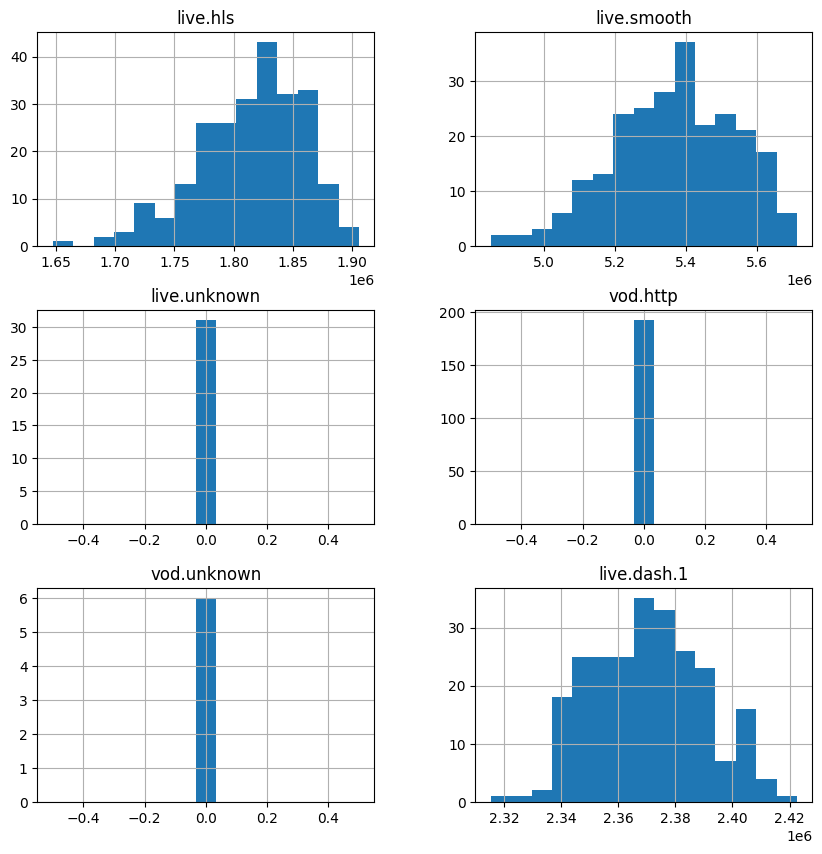

In [67]:
avg_bitrate_df_hist = avg_bitrate_df.iloc[:,1:7].hist(figsize=(10,10),bins=15)

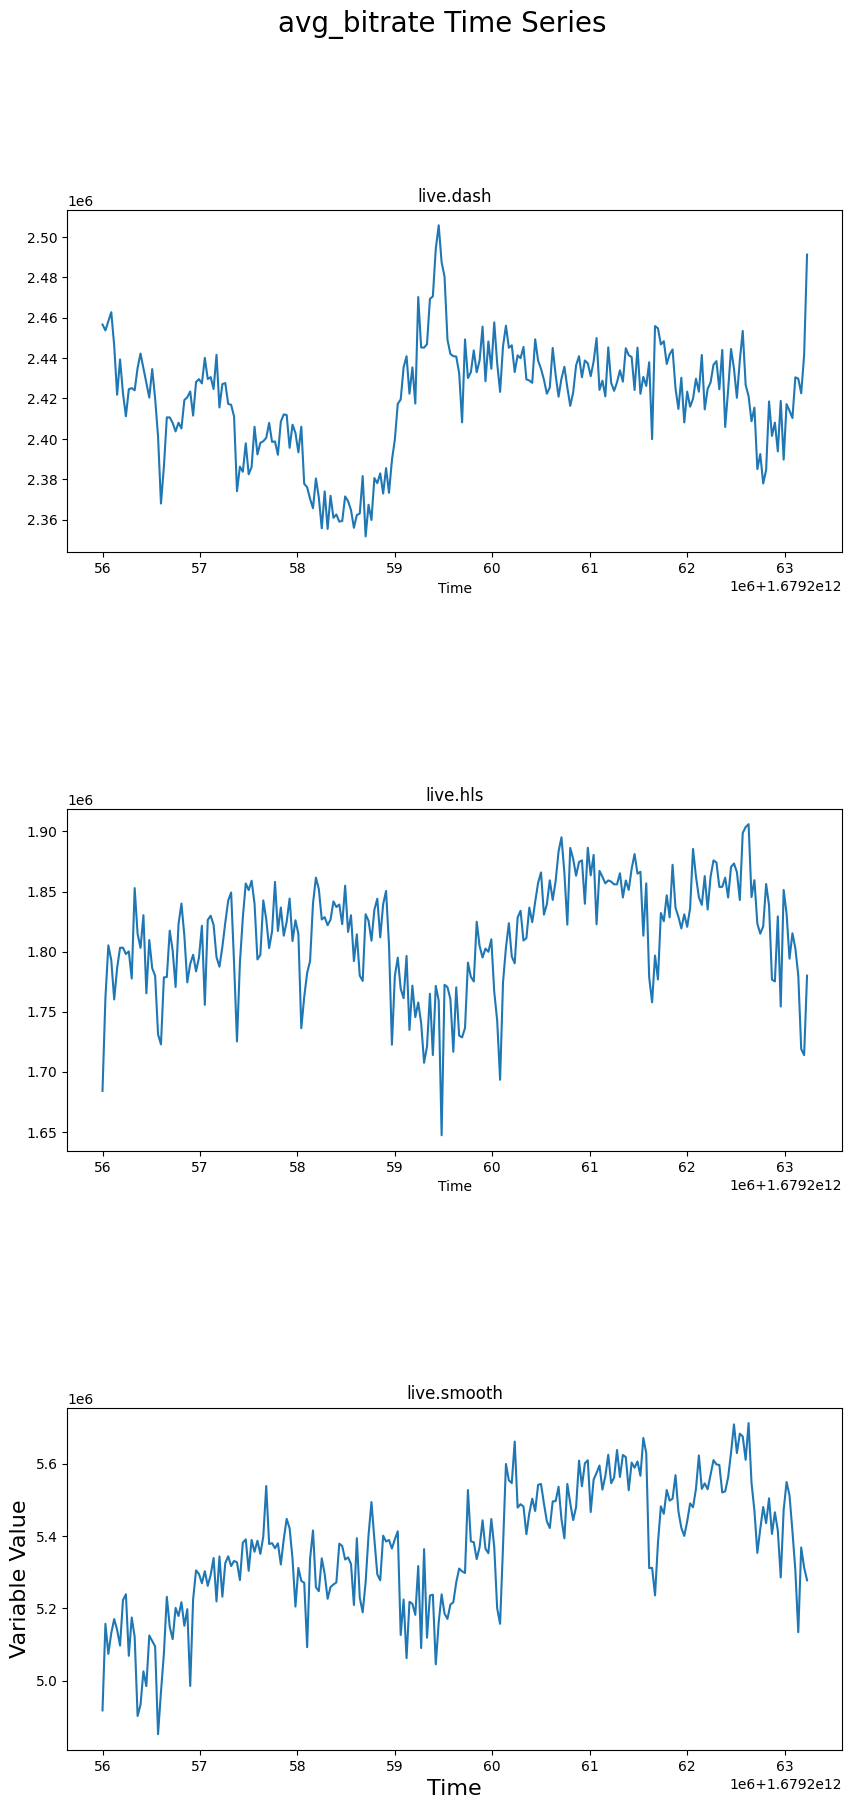

In [53]:
# Read in the dataset
avg_bitrate_df = pd.read_csv('avg_bitrate_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
avg_bitrate_df = avg_bitrate_df.iloc[:,:3].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(avg_bitrate_df.columns), figsize=(10, 20))
for i, column in enumerate(avg_bitrate_df.columns):
    avg_bitrate_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('avg_bitrate Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

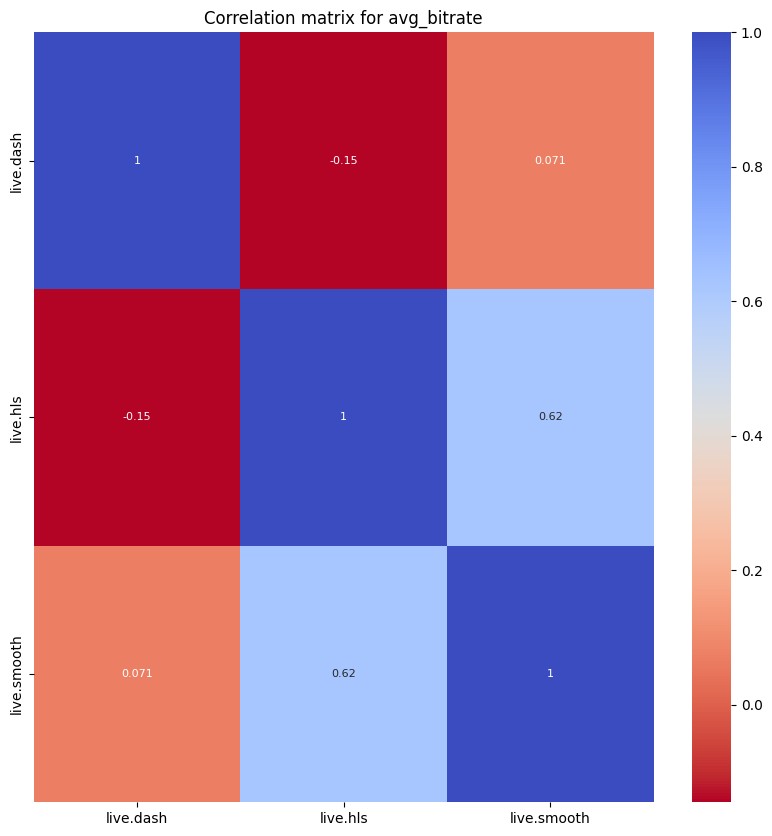

In [65]:
avg_bitrate_df = pd.read_csv('avg_bitrate_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_avg_bitrate = avg_bitrate_df.iloc[:,:3].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_avg_bitrate, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for avg_bitrate')
plt.show()

###CAPACITY (Shows when the server exceeds the capacity threshold established. normally 85%)

In [55]:
capacity_df.head(8)

Time  global.ce8mde1-01  wait.ce8mde1-01  global.ce8mde1-02  \
0  1679256000000                NaN              NaN                NaN   
1  1679256005000                NaN              NaN                NaN   
2  1679256010000                NaN              NaN                NaN   
3  1679256015000                NaN              NaN                NaN   
4  1679256020000                NaN              NaN                NaN   
5  1679256025000                NaN              NaN                NaN   
6  1679256030000                NaN              NaN                NaN   
7  1679256035000                NaN              NaN                NaN   

   wait.ce8mde1-02  global.cecbep1-01  wait.cecbep1-01  global.cecbep1-02  \
0              NaN               10.0              2.0               12.0   
1              NaN                NaN              NaN                NaN   
2              NaN                NaN              NaN                NaN   
3              NaN                NaN              NaN                NaN   
4              NaN                NaN              NaN                NaN   
5              NaN                NaN              NaN                NaN   
6              NaN                NaN              NaN                NaN   
7              NaN                NaN              NaN                NaN   

   wait.cecbep1-02  global.cecbep1-03  ...  global.ceimsm1-14  \
0              7.0               16.0  ...               35.0   
1              NaN                NaN  ...                NaN   
2              NaN                NaN  ...                NaN   
3              NaN                NaN  ...                NaN   
4              NaN                NaN  ...                NaN   
5              NaN                NaN  ...                NaN   
6              NaN                NaN  ...                NaN   
7              NaN                NaN  ...                NaN   

   wait.ceimsm1-14  global.ceimsm1-15  wait.ceimsm1-15  global.ceimsm1-16  \
0              5.0               30.0              7.0               31.0   
1              NaN                NaN              NaN                NaN   
2              NaN                NaN              NaN                NaN   
3              NaN                NaN              NaN                NaN   
4              NaN                NaN              NaN                NaN   
5              NaN                NaN              NaN                NaN   
6              NaN                NaN              NaN                NaN   
7              NaN                NaN              NaN                NaN   

   wait.ceimsm1-16  global.ceimsm1-17  wait.ceimsm1-17  global.ceimsm1-18  \
0              5.0               31.0              5.0               25.0   
1              NaN                NaN              NaN                NaN   
2              NaN                NaN              NaN                NaN   
3              NaN                NaN              NaN                NaN   
4              NaN                NaN              NaN                NaN   
5              NaN                NaN              NaN                NaN   
6              NaN                NaN              NaN                NaN   
7              NaN                NaN              NaN                NaN   

   wait.ceimsm1-18  
0              2.0  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7              NaN  

[8 rows x 179 columns]

In [56]:
capacity_df.iloc[:,:30].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                1452 non-null   int64  
 1   global.ce8mde1-01   72 non-null     float64
 2   wait.ce8mde1-01     72 non-null     float64
 3   global.ce8mde1-02   41 non-null     float64
 4   wait.ce8mde1-02     41 non-null     float64
 5   global.cecbep1-01   121 non-null    float64
 6   wait.cecbep1-01     121 non-null    float64
 7   global.cecbep1-02   121 non-null    float64
 8   wait.cecbep1-02     121 non-null    float64
 9   global.cecbep1-03   121 non-null    float64
 10  wait.cecbep1-03     121 non-null    float64
 11  global.cecbep1-04   121 non-null    float64
 12  wait.cecbep1-04     121 non-null    float64
 13  global.cecbep1-06   121 non-null    float64
 14  wait.cecbep1-06     121 non-null    float64
 15  global.cecbep1-07   121 non-null    float64
 16  wait.c

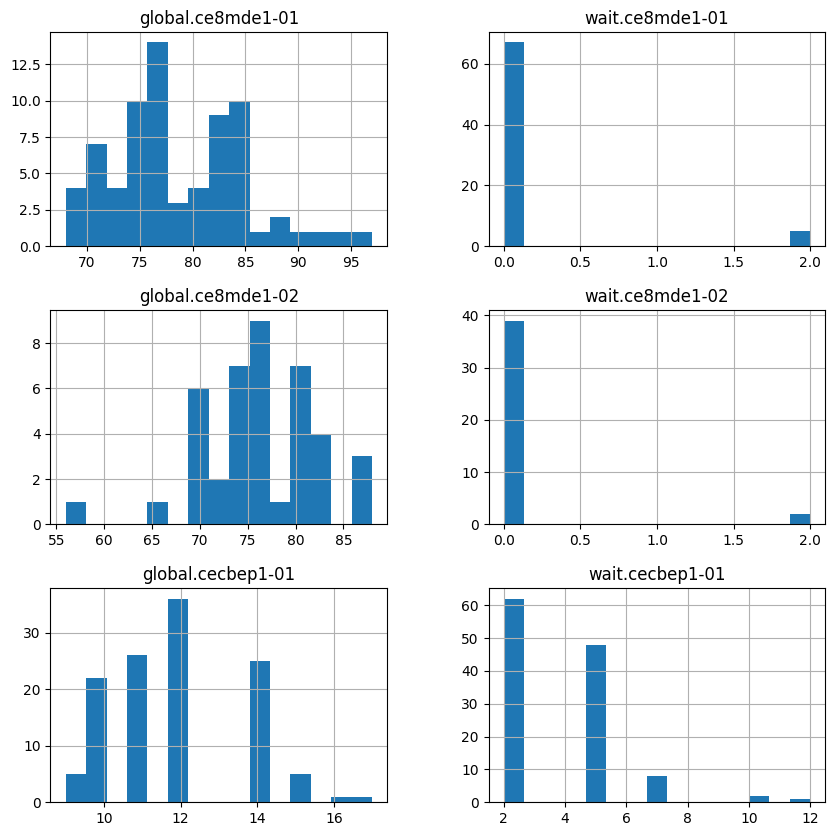

In [57]:
capacity_df_hist = capacity_df.iloc[:,1:7].hist(figsize=(10,10),bins=15)

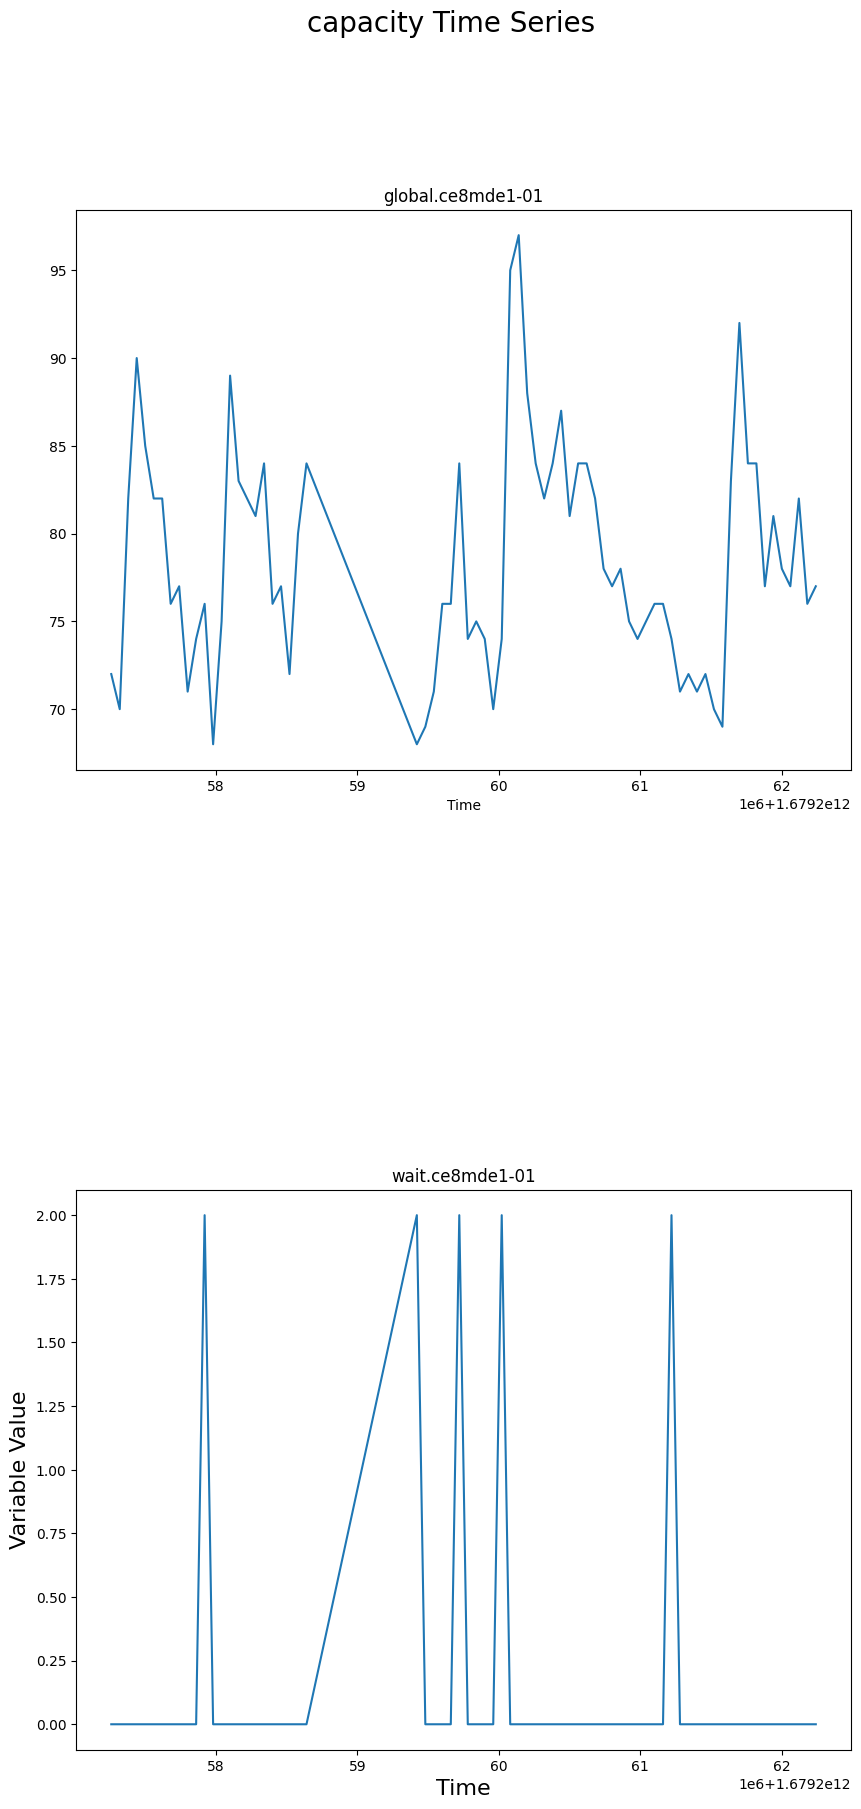

In [58]:
# Read in the dataset
capacity_df = pd.read_csv('capacidades_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
capacity_df = capacity_df.iloc[:,:2].dropna().astype('float')

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(capacity_df.columns), figsize=(10, 20))
for i, column in enumerate(capacity_df.columns):
    capacity_df[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('capacity Time Series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()

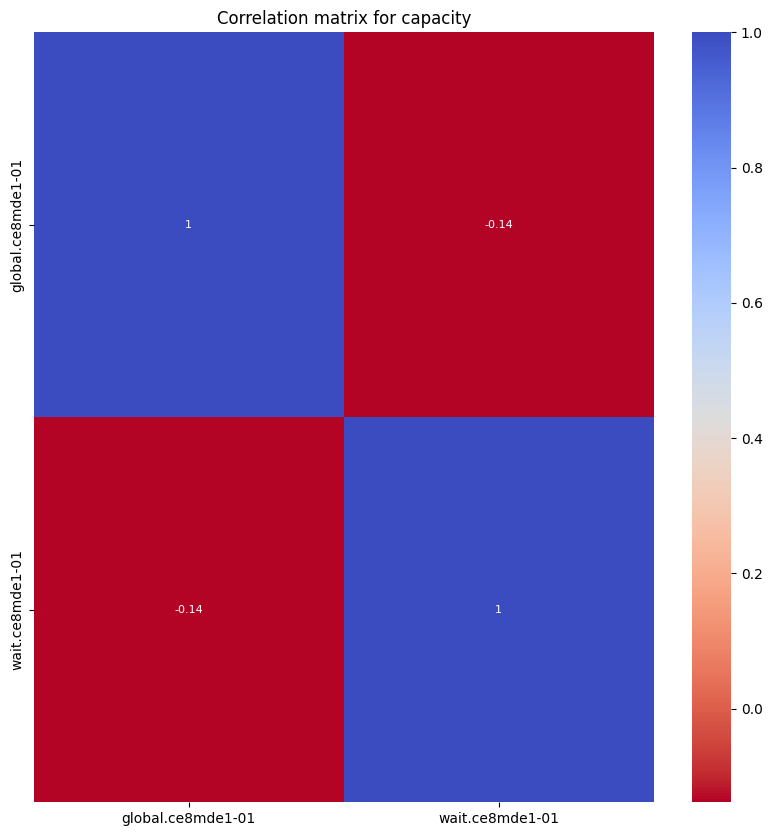

In [68]:
capacidades_df = pd.read_csv('capacidades_tde_190323_21_23.csv', skiprows=1, parse_dates=[0], index_col=[0])
corr_capacidades = capacidades_df.iloc[:,:2].corr()
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_capacidades, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix for capacity')
plt.show()

##CORRELATION BETWEEN DATASETS

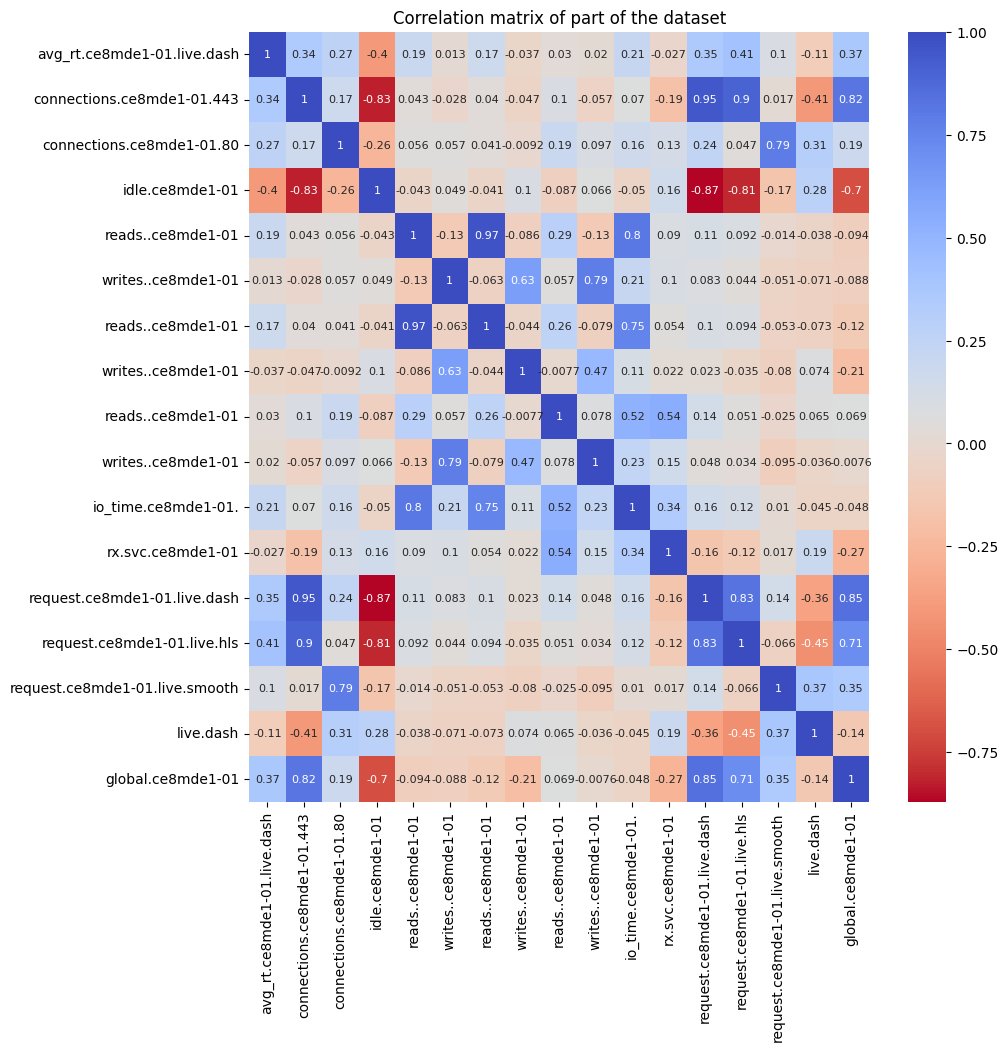

In [60]:
#Reading the different datasets
avg_rt_df = pd.read_csv('avg_rt_tde_190323_21_23.csv', skiprows=1)
connections_df = pd.read_csv('connections_tde_190323_21_23.csv', skiprows=1)
cpu_df = pd.read_csv('cpu_tde_190323_21_23.csv', skiprows=1)
disk_iops_df = pd.read_csv('disk_iops_tde_190323_21_23.csv', skiprows=1)
disk_time_df = pd.read_csv('disk_time_tde_190323_21_23.csv', skiprows=1)
disk_throughput_df = pd.read_csv('disk_troughput_tde_190323_21_23.csv', skiprows=1)
disk_use_df = pd.read_csv('disk_use_tde_190323_21_23.csv', skiprows=1)
network_df = pd.read_csv('network_tde_190323_21_23.csv', skiprows=1)
total_request_df = pd.read_csv('total_request_tde_190323_21_23.csv', skiprows=1)
avg_bitrate_df = pd.read_csv('avg_bitrate_tde_190323_21_23.csv', skiprows=1)
saturations_df = pd.read_csv('saturations_tde_190323_21_23.csv', skiprows=1)
capacidades_df = pd.read_csv('capacidades_tde_190323_21_23.csv', skiprows=1)

data = [avg_rt_df,connections_df,cpu_df,disk_iops_df,disk_time_df,disk_throughput_df,disk_use_df,network_df,total_request_df,avg_bitrate_df,saturations_df,capacidades_df]

sample_df = []

sample_df.append(avg_rt_df.iloc[:,1])
sample_df.append(connections_df.iloc[:,1:3])
sample_df.append(cpu_df.iloc[:,1])
sample_df.append(disk_iops_df.iloc[:,1:3])
sample_df.append(disk_time_df.iloc[:,1:3])
sample_df.append(disk_throughput_df.iloc[:,1:3])
sample_df.append(disk_use_df.iloc[:,1])
sample_df.append(network_df.iloc[:,1])
sample_df.append(total_request_df.iloc[:,1:4])
sample_df.append(avg_bitrate_df.iloc[:,1])
sample_df.append(capacidades_df.iloc[:,1])


sample_df = pd.concat(sample_df, axis=1)
corr_matrix = sample_df.corr()

fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix of part of the dataset')
plt.show()

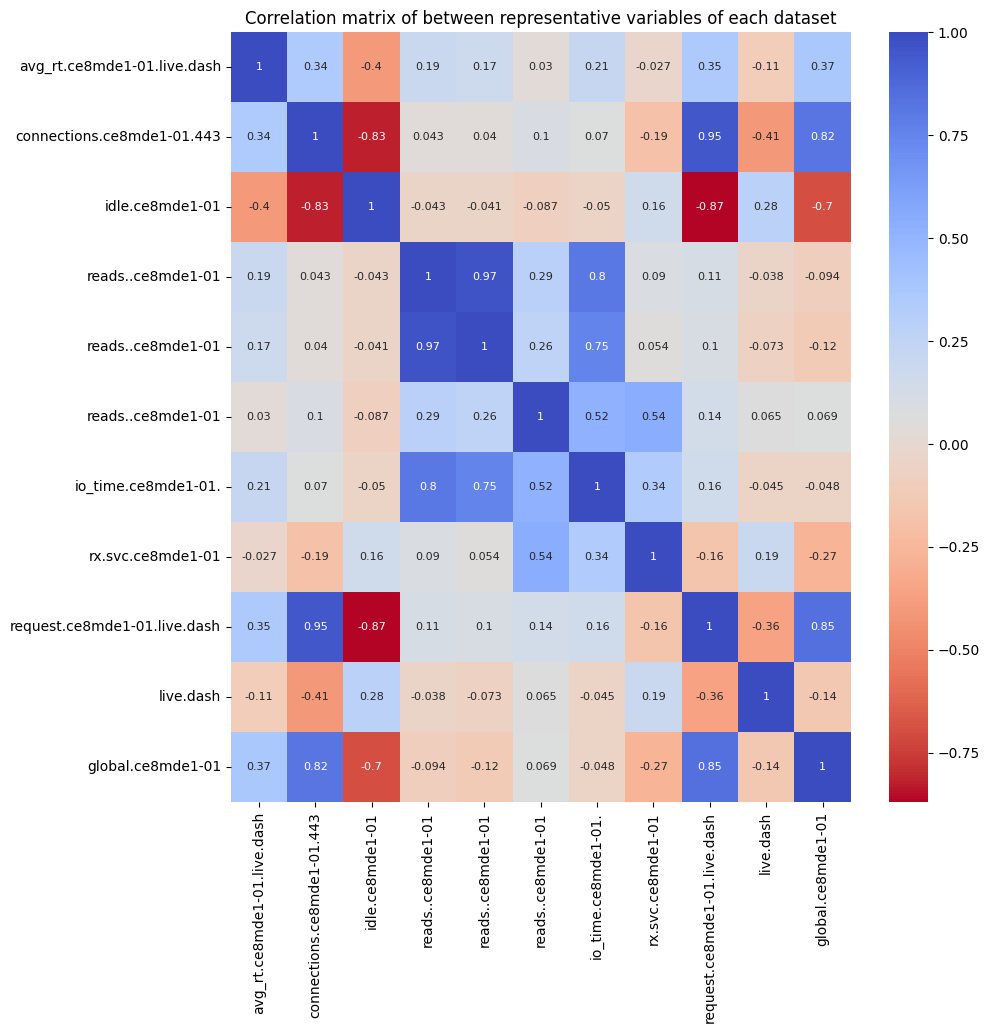

In [61]:
#Reading the different datasets
avg_rt_df = pd.read_csv('avg_rt_tde_190323_21_23.csv', skiprows=1)
connections_df = pd.read_csv('connections_tde_190323_21_23.csv', skiprows=1)
cpu_df = pd.read_csv('cpu_tde_190323_21_23.csv', skiprows=1)
disk_iops_df = pd.read_csv('disk_iops_tde_190323_21_23.csv', skiprows=1)
disk_time_df = pd.read_csv('disk_time_tde_190323_21_23.csv', skiprows=1)
disk_throughput_df = pd.read_csv('disk_troughput_tde_190323_21_23.csv', skiprows=1)
disk_use_df = pd.read_csv('disk_use_tde_190323_21_23.csv', skiprows=1)
network_df = pd.read_csv('network_tde_190323_21_23.csv', skiprows=1)
total_request_df = pd.read_csv('total_request_tde_190323_21_23.csv', skiprows=1)
avg_bitrate_df = pd.read_csv('avg_bitrate_tde_190323_21_23.csv', skiprows=1)
saturations_df = pd.read_csv('saturations_tde_190323_21_23.csv', skiprows=1)
capacidades_df = pd.read_csv('capacidades_tde_190323_21_23.csv', skiprows=1)

data = [avg_rt_df,connections_df,cpu_df,disk_iops_df,disk_time_df,disk_throughput_df,disk_use_df,network_df,total_request_df,avg_bitrate_df,saturations_df,capacidades_df]

sample_df = []

sample_df.append(avg_rt_df.iloc[:,1])
sample_df.append(connections_df.iloc[:,1])
sample_df.append(cpu_df.iloc[:,1])
sample_df.append(disk_iops_df.iloc[:,1])
sample_df.append(disk_time_df.iloc[:,1])
sample_df.append(disk_throughput_df.iloc[:,1])
sample_df.append(disk_use_df.iloc[:,1])
sample_df.append(network_df.iloc[:,1])
sample_df.append(total_request_df.iloc[:,1])
sample_df.append(avg_bitrate_df.iloc[:,1])
sample_df.append(capacidades_df.iloc[:,1])


sample_df = pd.concat(sample_df, axis=1)
corr_matrix = sample_df.corr()

fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot_kws={'size':8}, annot=True, ax=ax)
ax.set_title('Correlation matrix of between representative variables of each dataset')
plt.show()

##Time Series comparison between the most correlated variables

In [62]:
sample_df_2 = sample_df.iloc[:, [0, 1, 2, 8, 10]]

In [63]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
sample_df_imputed = pd.DataFrame(imputer.fit_transform(sample_df_2),columns = sample_df_2.columns)

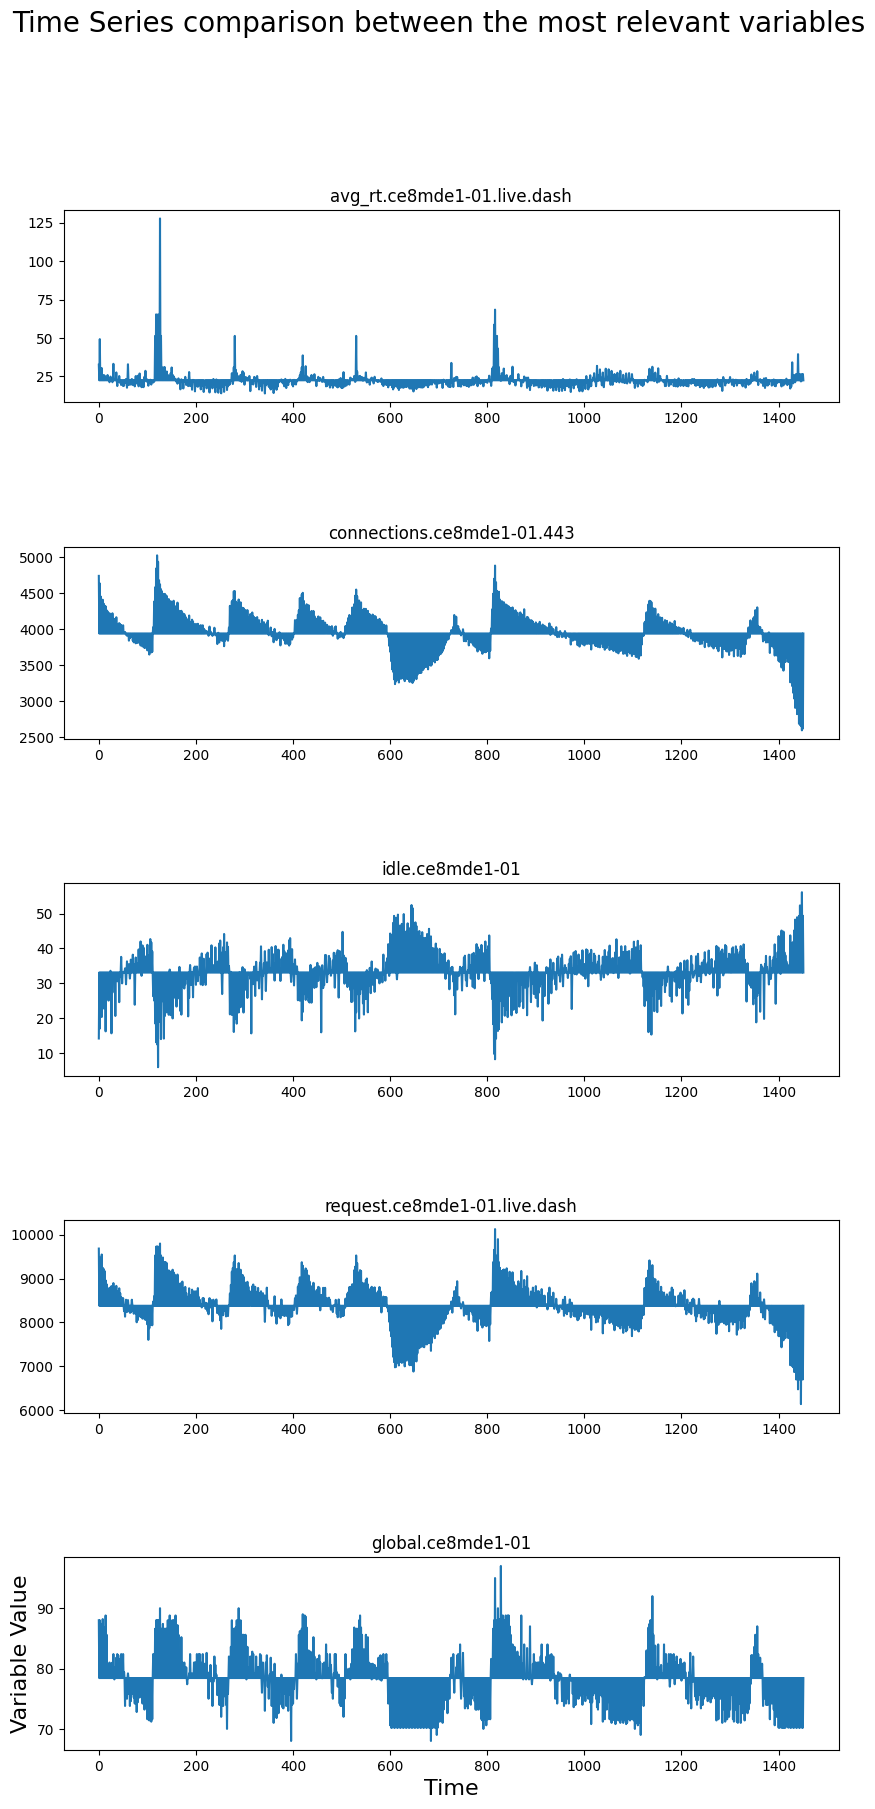

In [64]:
# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=len(sample_df_imputed.columns), figsize=(10, 20))
for i, column in enumerate(sample_df_imputed.columns):
    sample_df_imputed[column].plot(ax=axes[i], title=column)

# Set overall plot title and axis labels
plt.suptitle('Time Series comparison between the most relevant variables', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Variable Value', fontsize=16)
plt.subplots_adjust(hspace=0.75, wspace=0.75)

# Show the plot
plt.show()